In [1]:
import sys
sys.path.append("../")
sys.path.append("../lib/")

sys.path

['c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\python36.zip',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\DLLs',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\lib',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64',
 '',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32\\lib',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\Pythonwin',
 'c:\\program files (x86)\\microsoft visual studio\\shared\\python36_64\\lib\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\IPython\\extensions',
 'C:\\Users\\Previato\\.ipython',
 '../',
 '../lib/']

In [2]:
import src.enviroment as enviroment
import src.pacman_problem as pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
import time
warnings.filterwarnings("ignore")

In [3]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140],
             'maze-test.txt':[28,28]}

In [4]:
maze_name = 'Mazes/TinyMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (3, 4)
Goal position: (24, 21)


In [5]:
tam_plot = 30
mazeName_plot = maze_name[6:maze_name.index('.')]

In [6]:
if maze_name == 'Mazes/BigMaze02.txt':
    initial_position = (1, 15)
    goal_position = (59, 125)

In [7]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [8]:
def make_grid_plot(maze, initial_position, goal_position, maze_name):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)

    plt.savefig("Figure/"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
def make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = 'hot'

    im = ax.imshow(maze.shockwave_grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.savefig("Figure/"+mazeName_plot+str(initial_position)+str(goal_position)+ 'SW.png', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
def make_path_plot(maze, initial_position, goal_position, node, maze_name, alg):    
    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    
    plt.savefig("Figure/"+alg+"Path_"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    

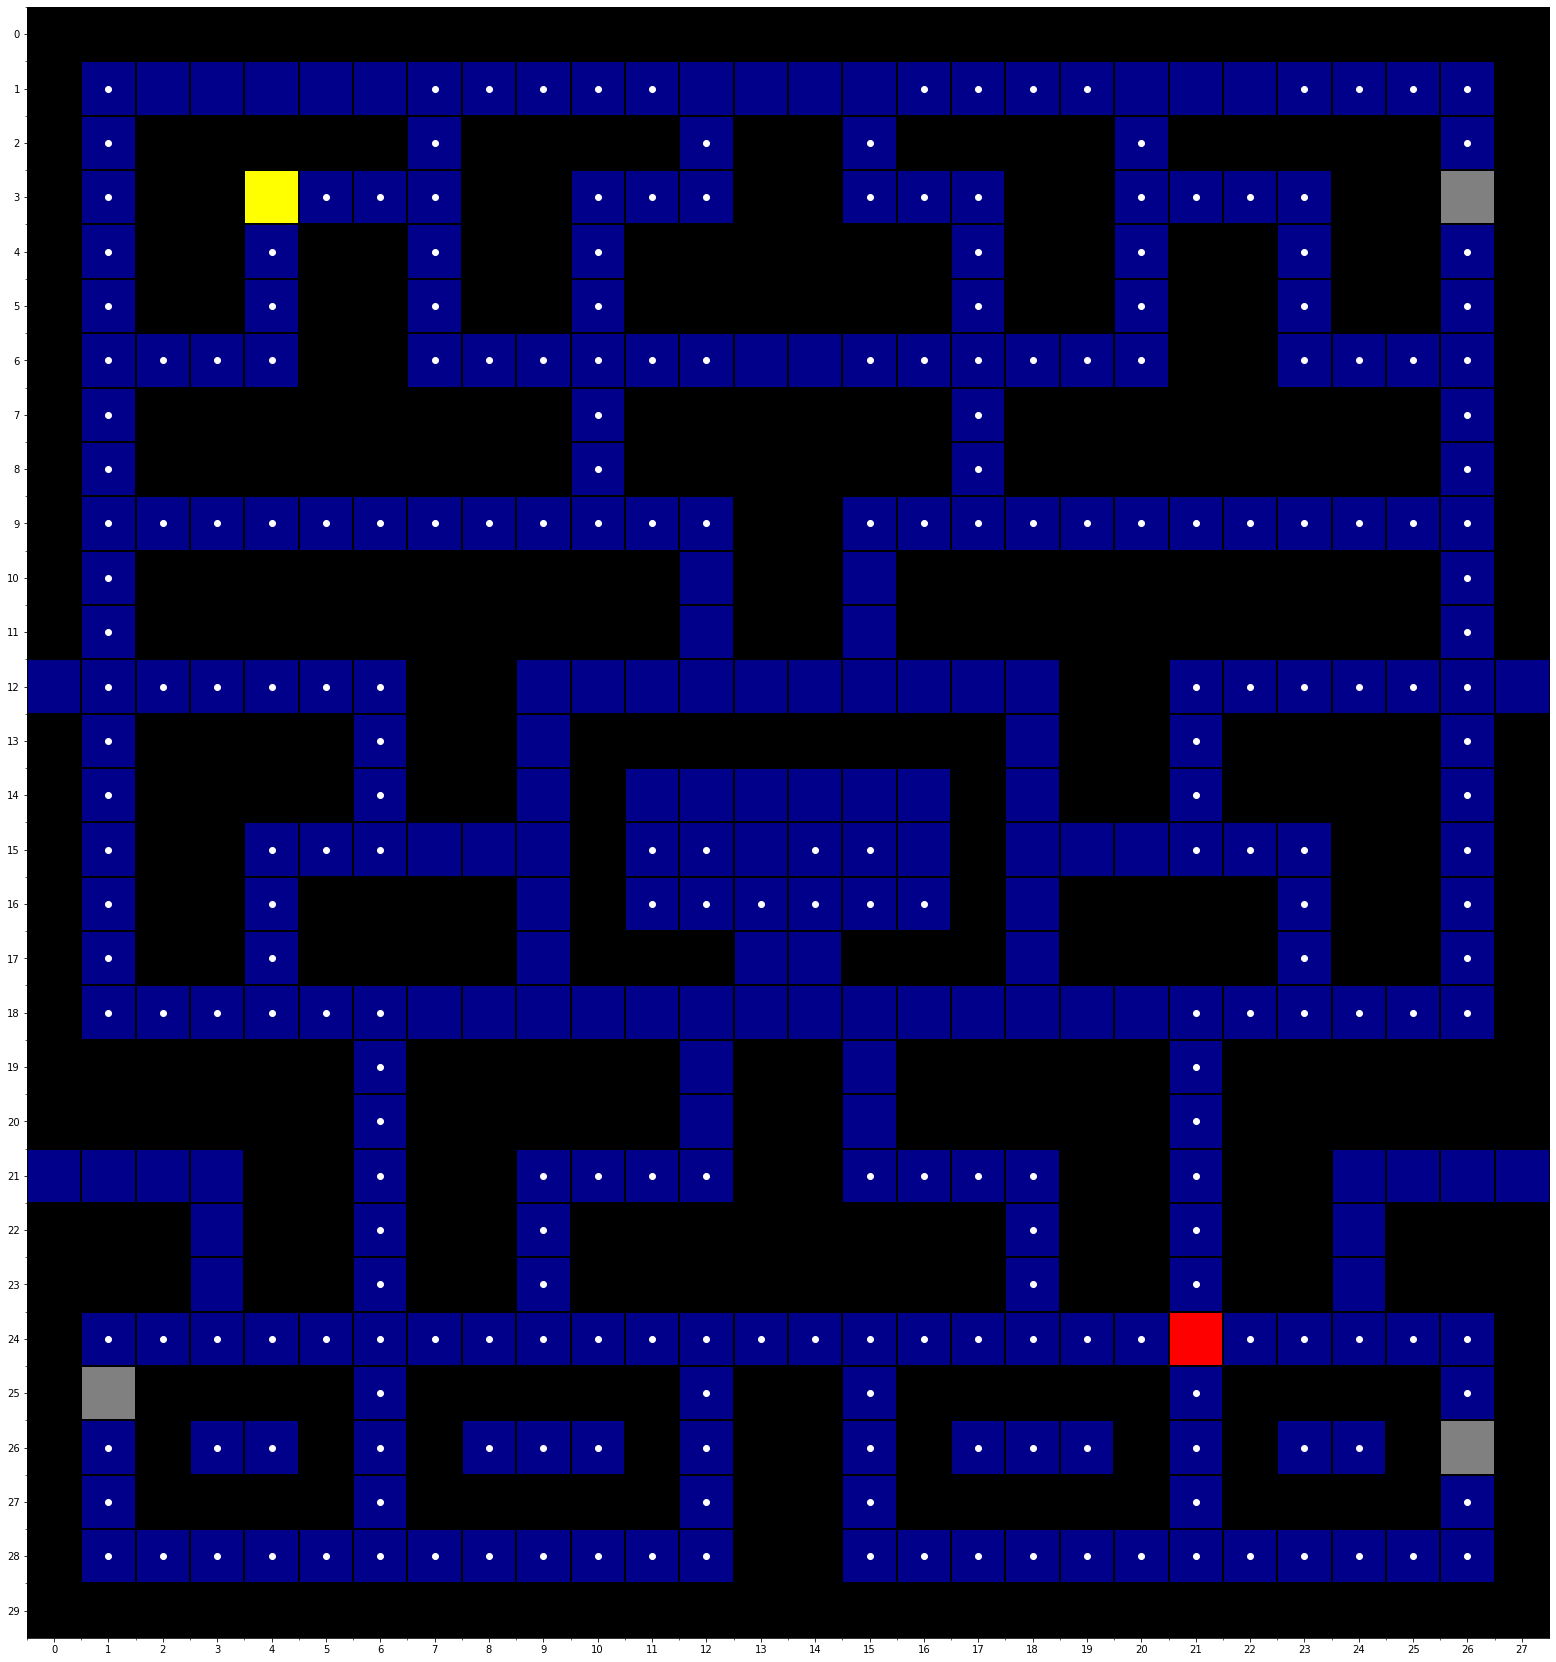

In [11]:
make_grid_plot(maze, initial_position, goal_position, mazeName_plot)

In [12]:
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

# Breadth First Search - BFS

Tempo execução:  0.05601191520690918
Maximum number of nodes in memory at same time:  17
Number of expanded nodes:
231
Number of expanded food nodes:
171
Number of nodes in the path:
33
Number of food nodes in the path:
29
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP:

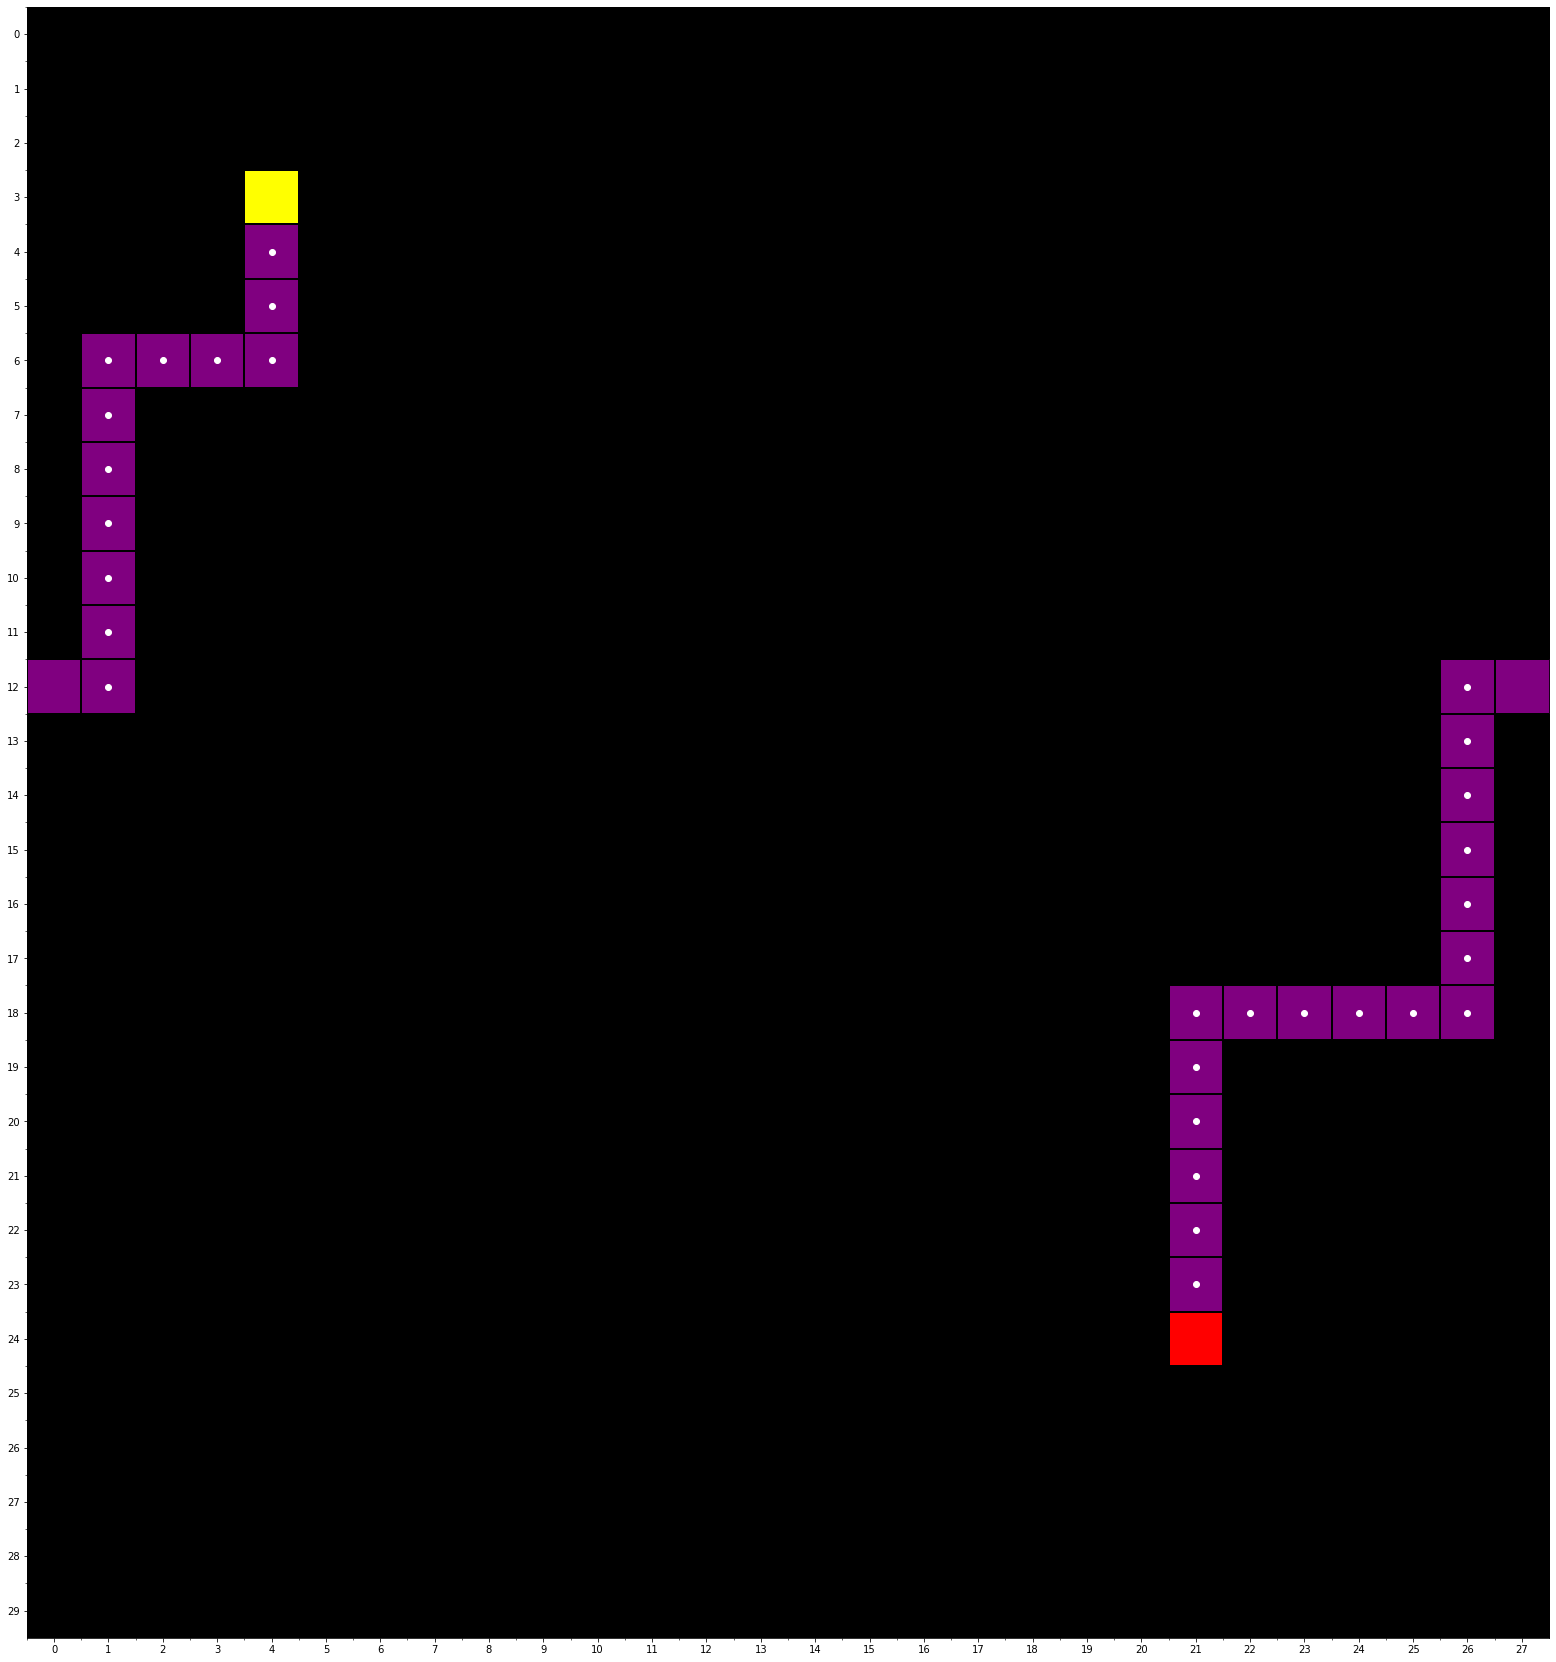

In [13]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.breadth_first_graph_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "BFS")

# Depth First Search - DFS

Tempo execução:  0.042932987213134766
Maximum number of nodes in memory at same time:  25
Number of expanded nodes:
205
Number of expanded food nodes:
138
Number of nodes in the path:
111
Number of food nodes in the path:
62
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>,

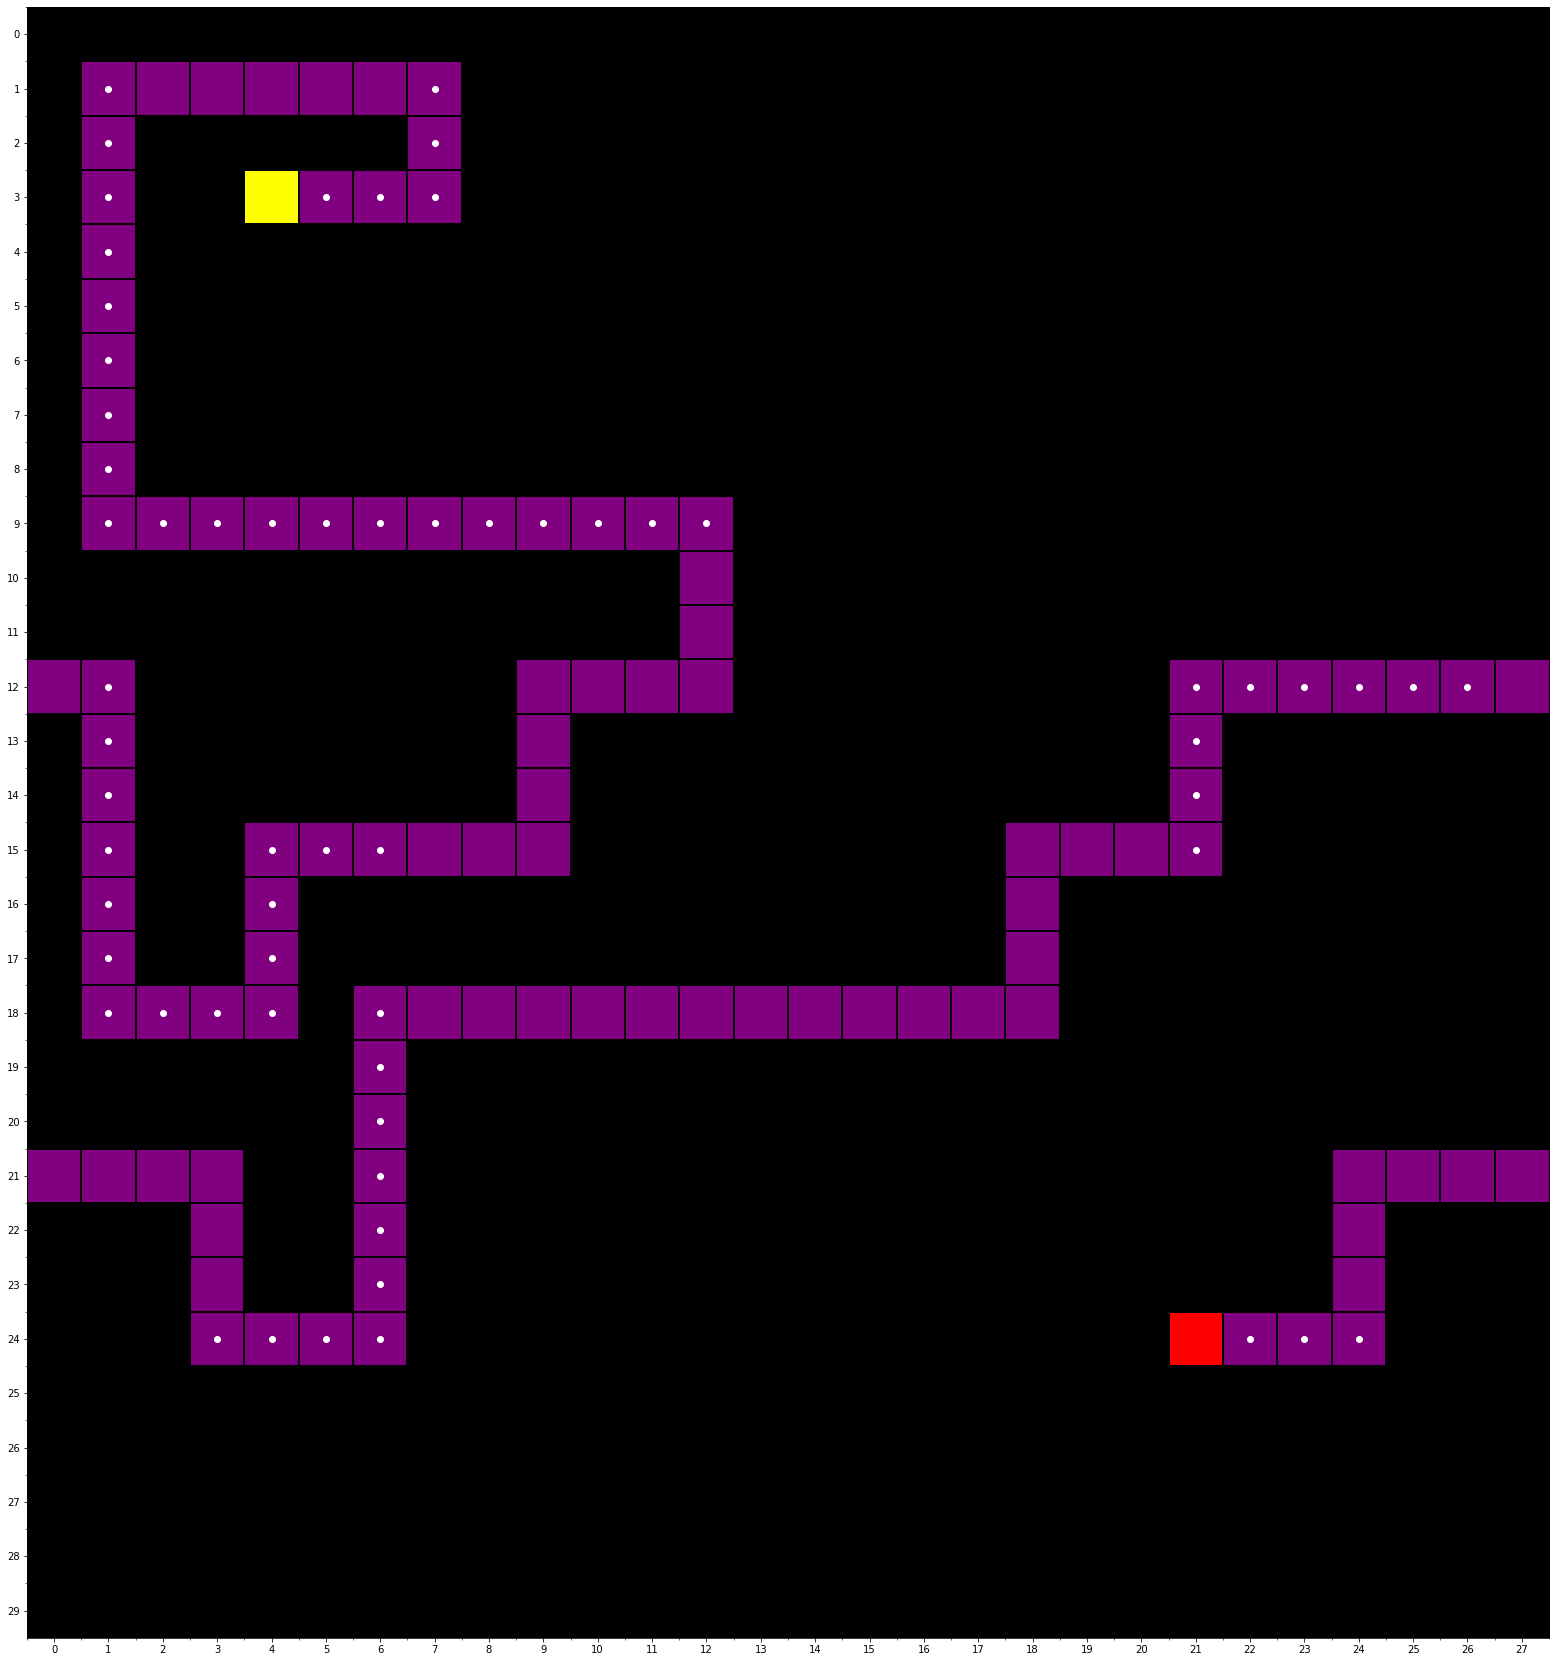

In [14]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.depth_first_graph_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "DFS")

# Greedy Search - Manhattan Distance

Tempo execução:  0.01400446891784668
Maximum number of nodes in memory at same time:  14
Number of expanded nodes:
60
Number of expanded food nodes:
55
Number of nodes in the path:
53
Number of food nodes in the path:
49
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Ac

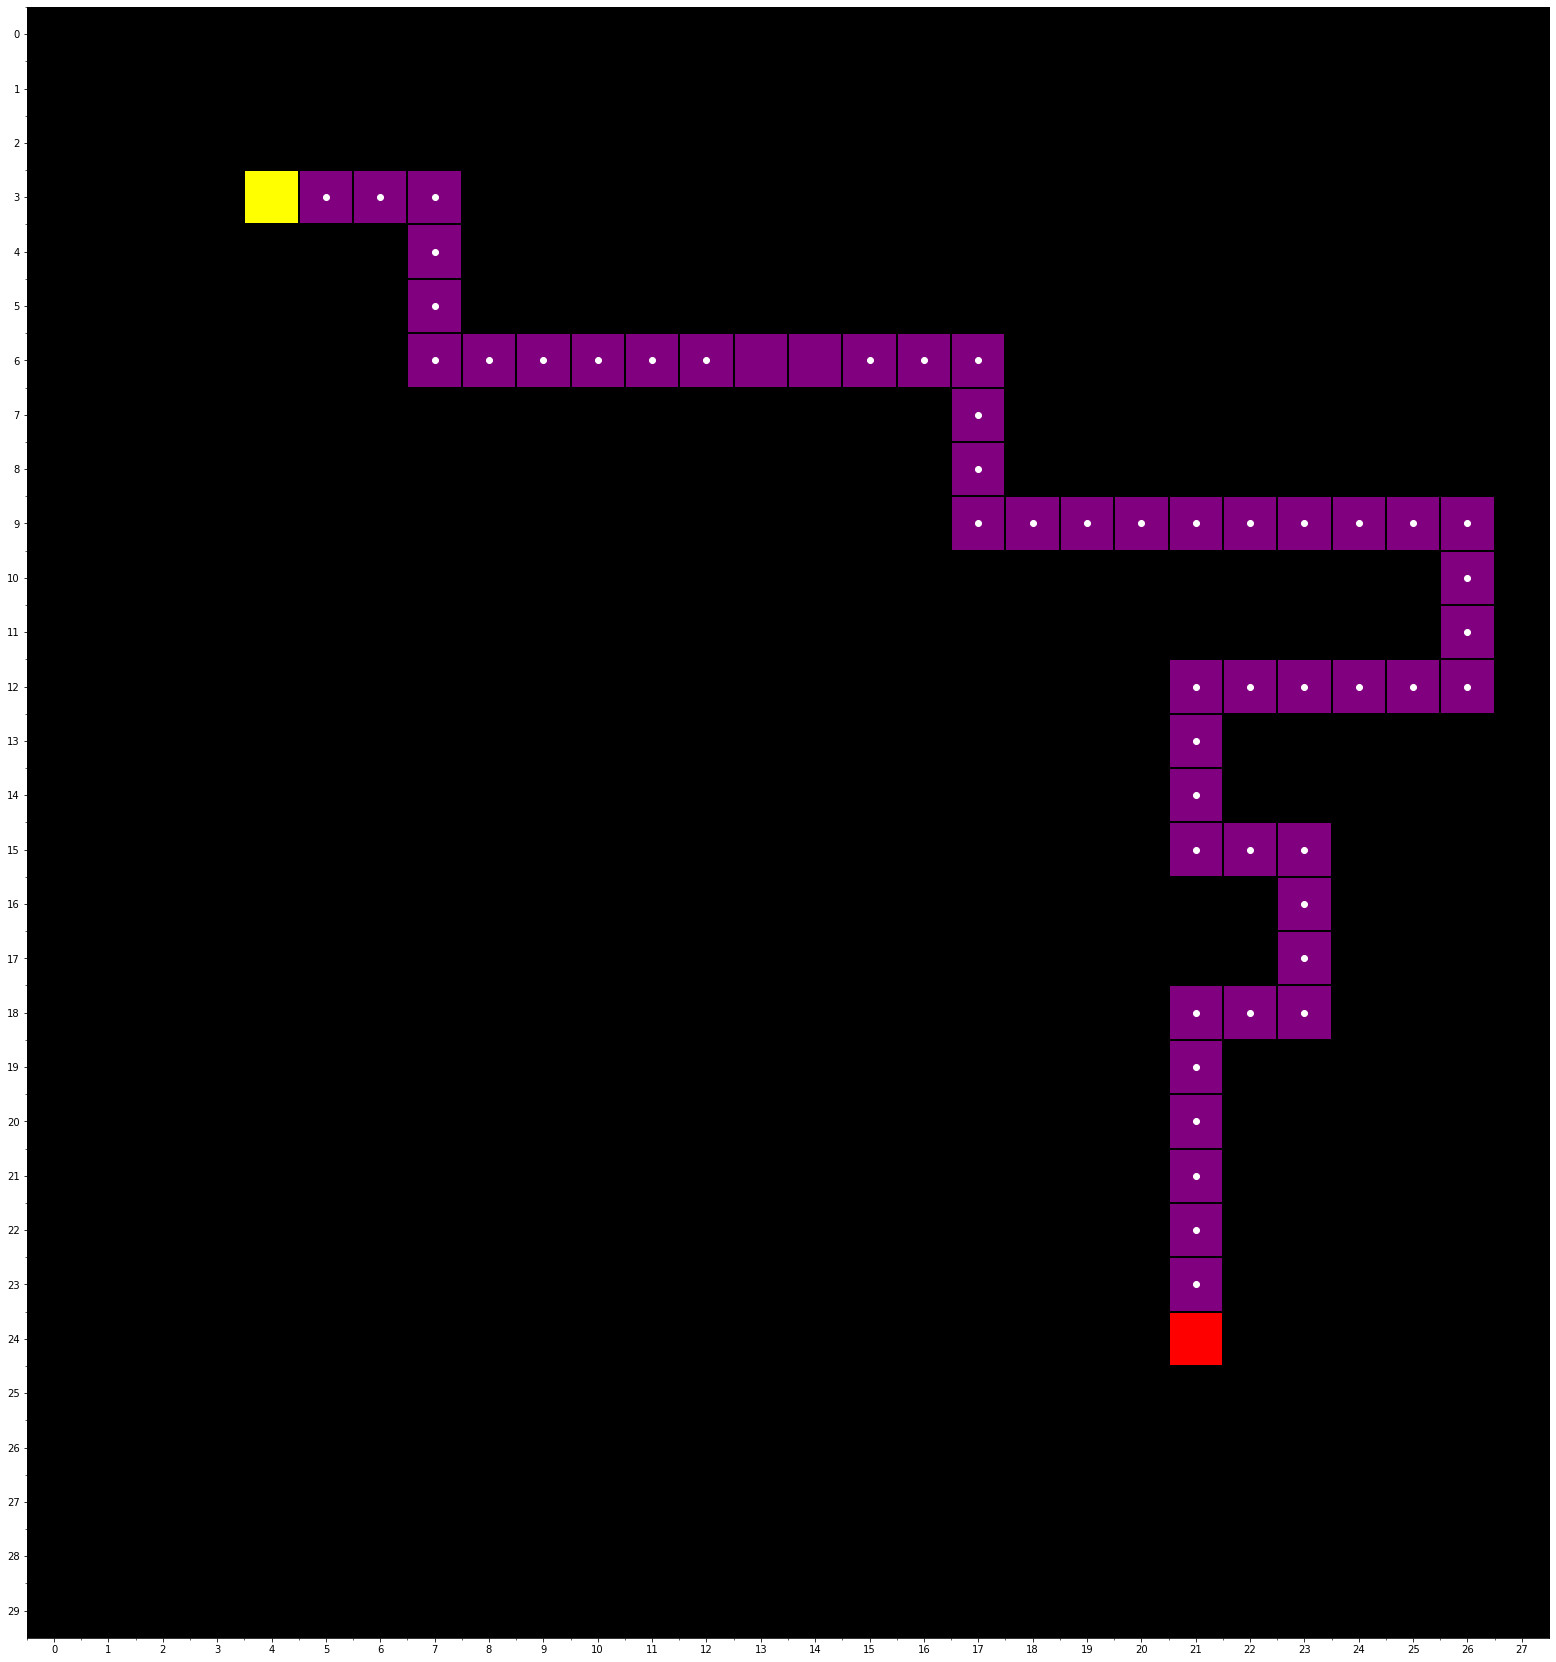

In [15]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-MD")

# A* Search - Manhattan Distance

Tempo execução:  0.015004158020019531
Maximum number of nodes in memory at same time:  15
Number of expanded nodes:
61
Number of expanded food nodes:
39
Number of nodes in the path:
39
Number of food nodes in the path:
20
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>

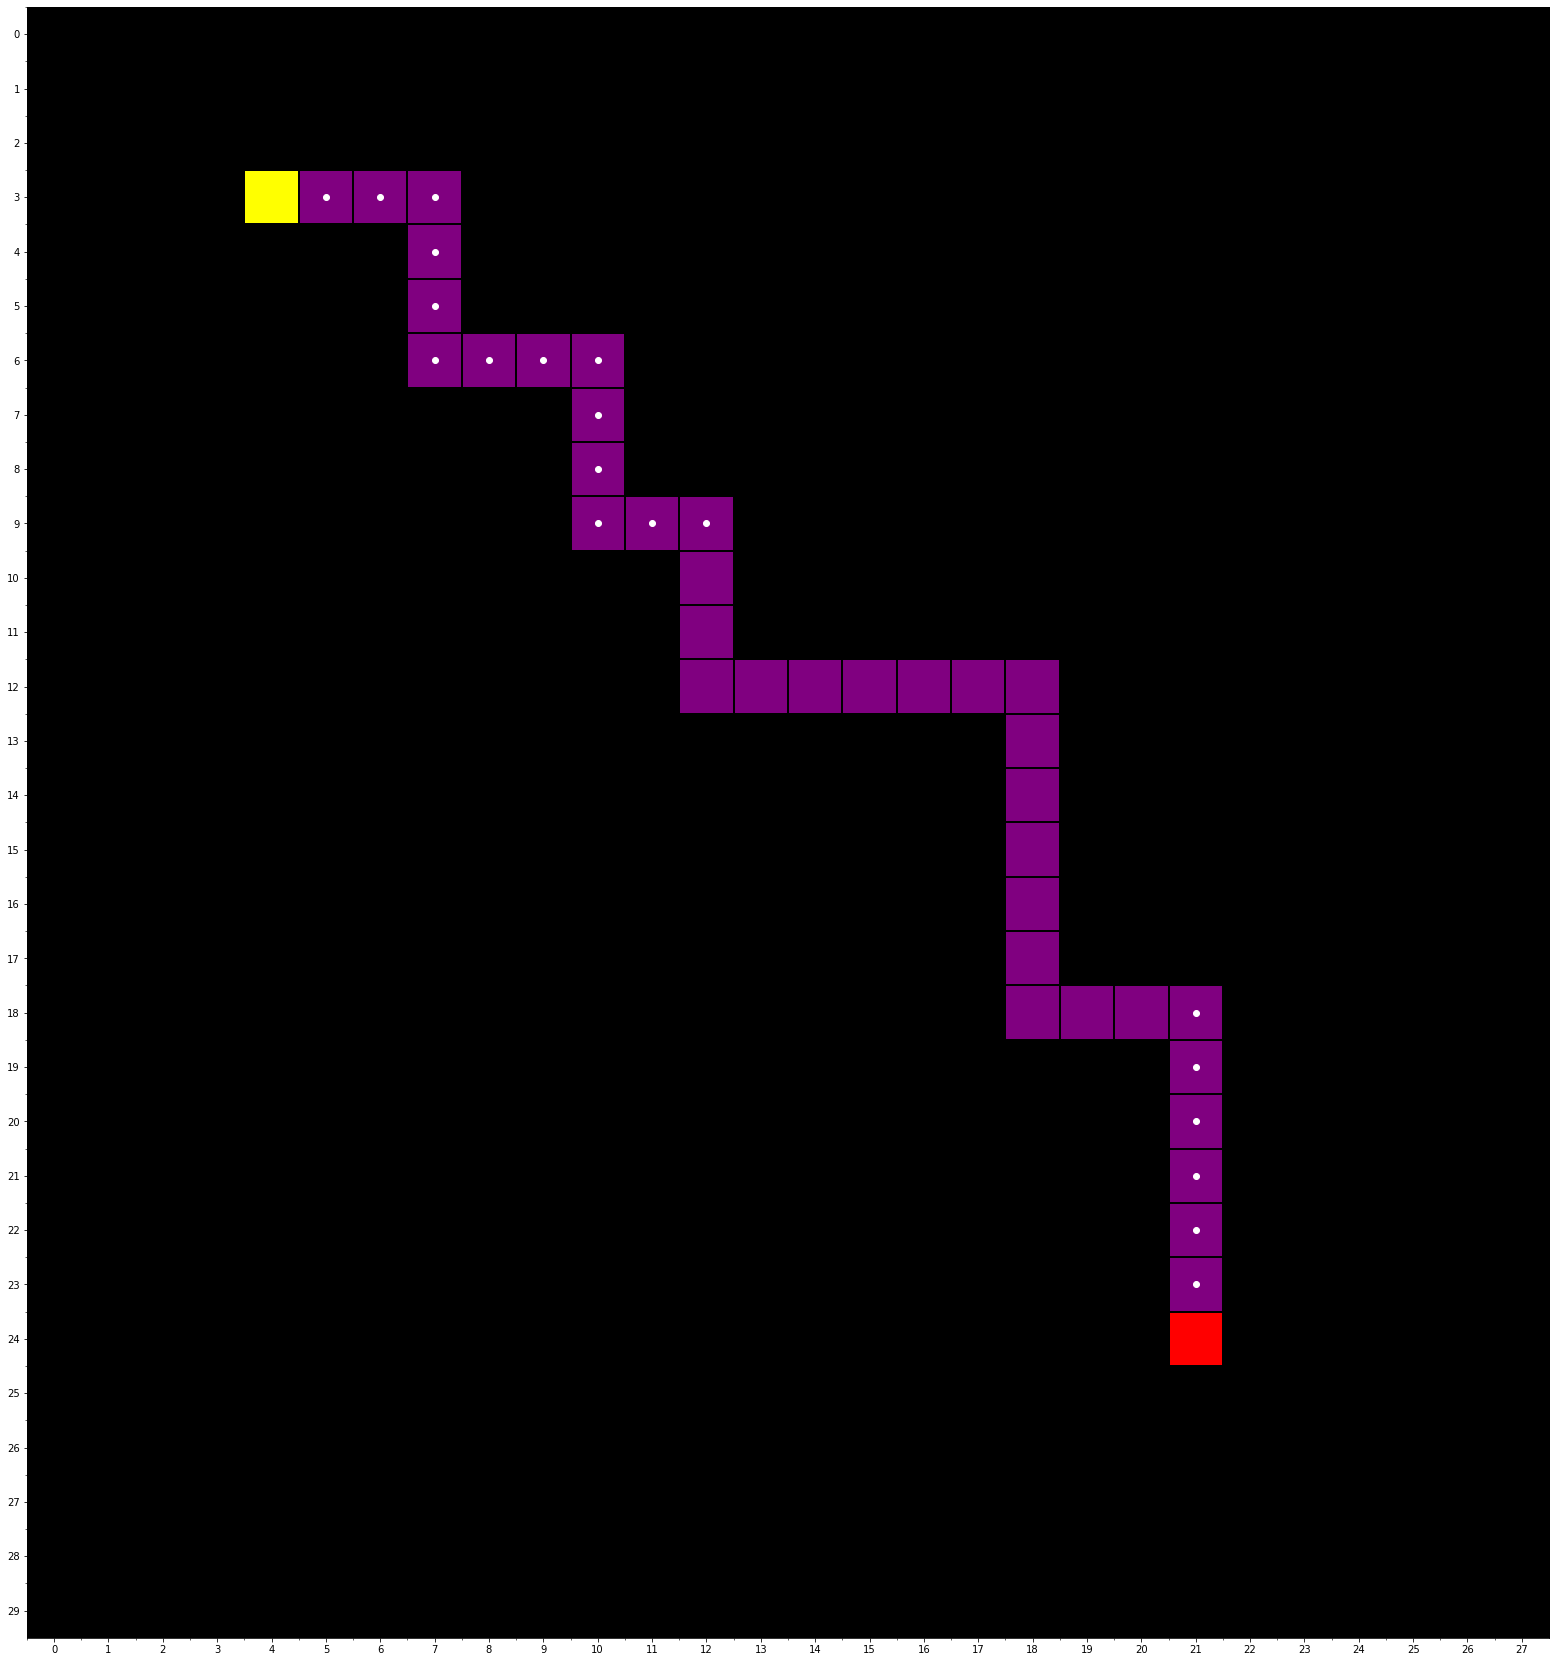

In [16]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-MD")

# Greedy Search - Ghost Avoidance Heuristic with Euclidean Distance

In [17]:
problem_ghost = pacman.PacmanProblem(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Tempo execução:  0.05901312828063965
Maximum number of nodes in memory at same time:  18
Number of expanded nodes:
267
Number of expanded food nodes:
196
Number of nodes in the path:
45
Number of food nodes in the path:
23
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)

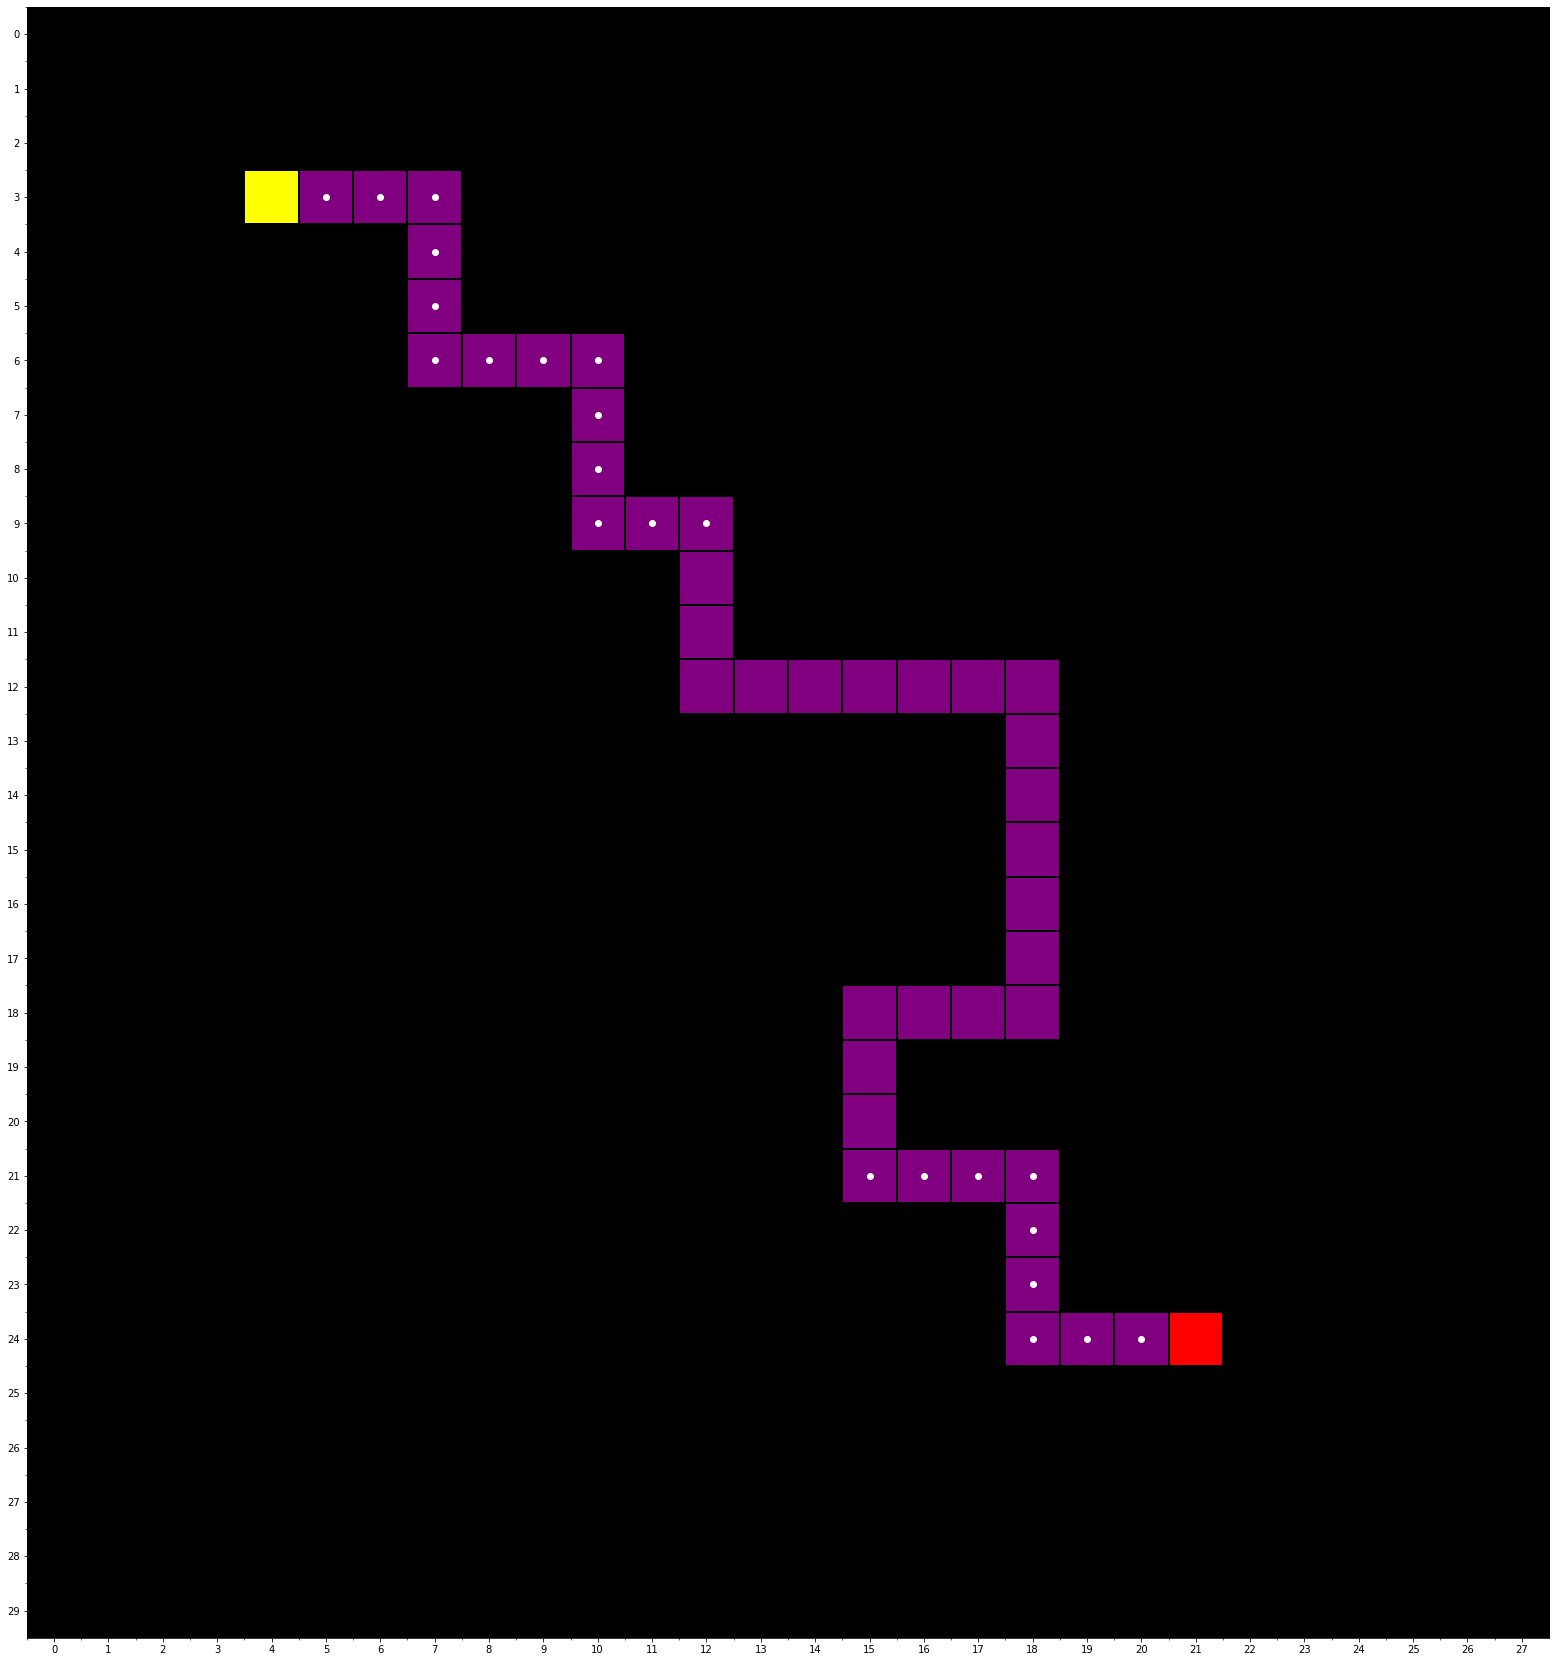

In [18]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem_ghost, problem_ghost.h_ghost_avoidance_euclidean)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-GAHED")

# A* Search - Ghost Avoidance Heuristic with Euclidean Distance

In [19]:
problem_ghost = pacman.PacmanProblem(maze, initial_position, goal_position, ghost_proximity_cost=1000)

Tempo execução:  0.0600130558013916
Maximum number of nodes in memory at same time:  21
Number of expanded nodes:
270
Number of expanded food nodes:
199
Number of nodes in the path:
39
Number of food nodes in the path:
20
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>

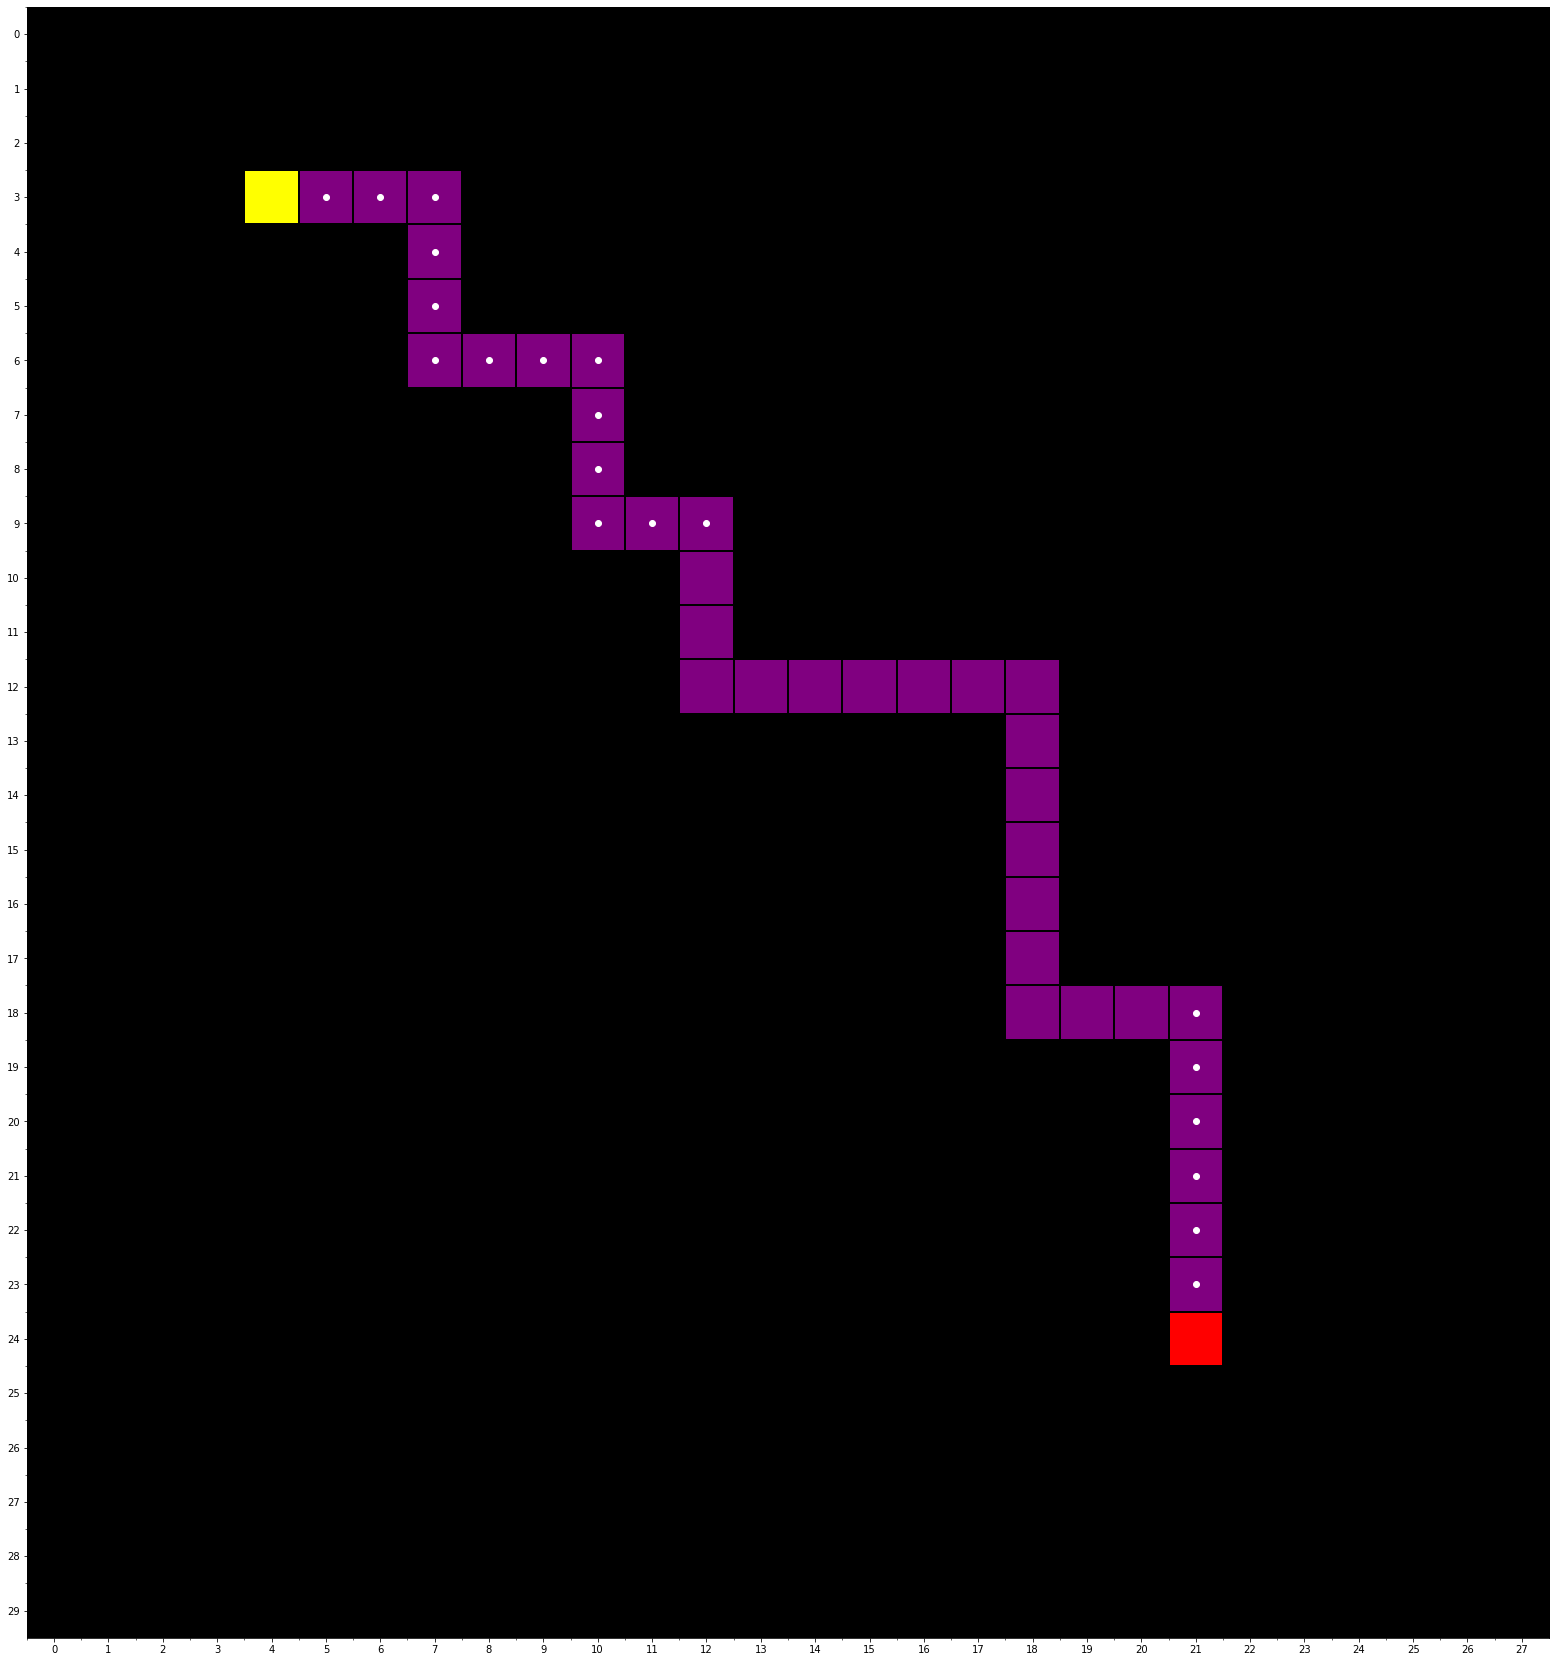

In [20]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem_ghost, problem_ghost.h_ghost_avoidance_euclidean)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-GAHED")

# A* Search - Shockwave Heuristic

In [21]:
maze, _, _ = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1], enviroment.ShockWaveMaze)
problem = pacman.PacmanProblem(maze, initial_position, goal_position)

### The lighter, the further from the goal

In [22]:
maze.set_shockwave(goal_position)

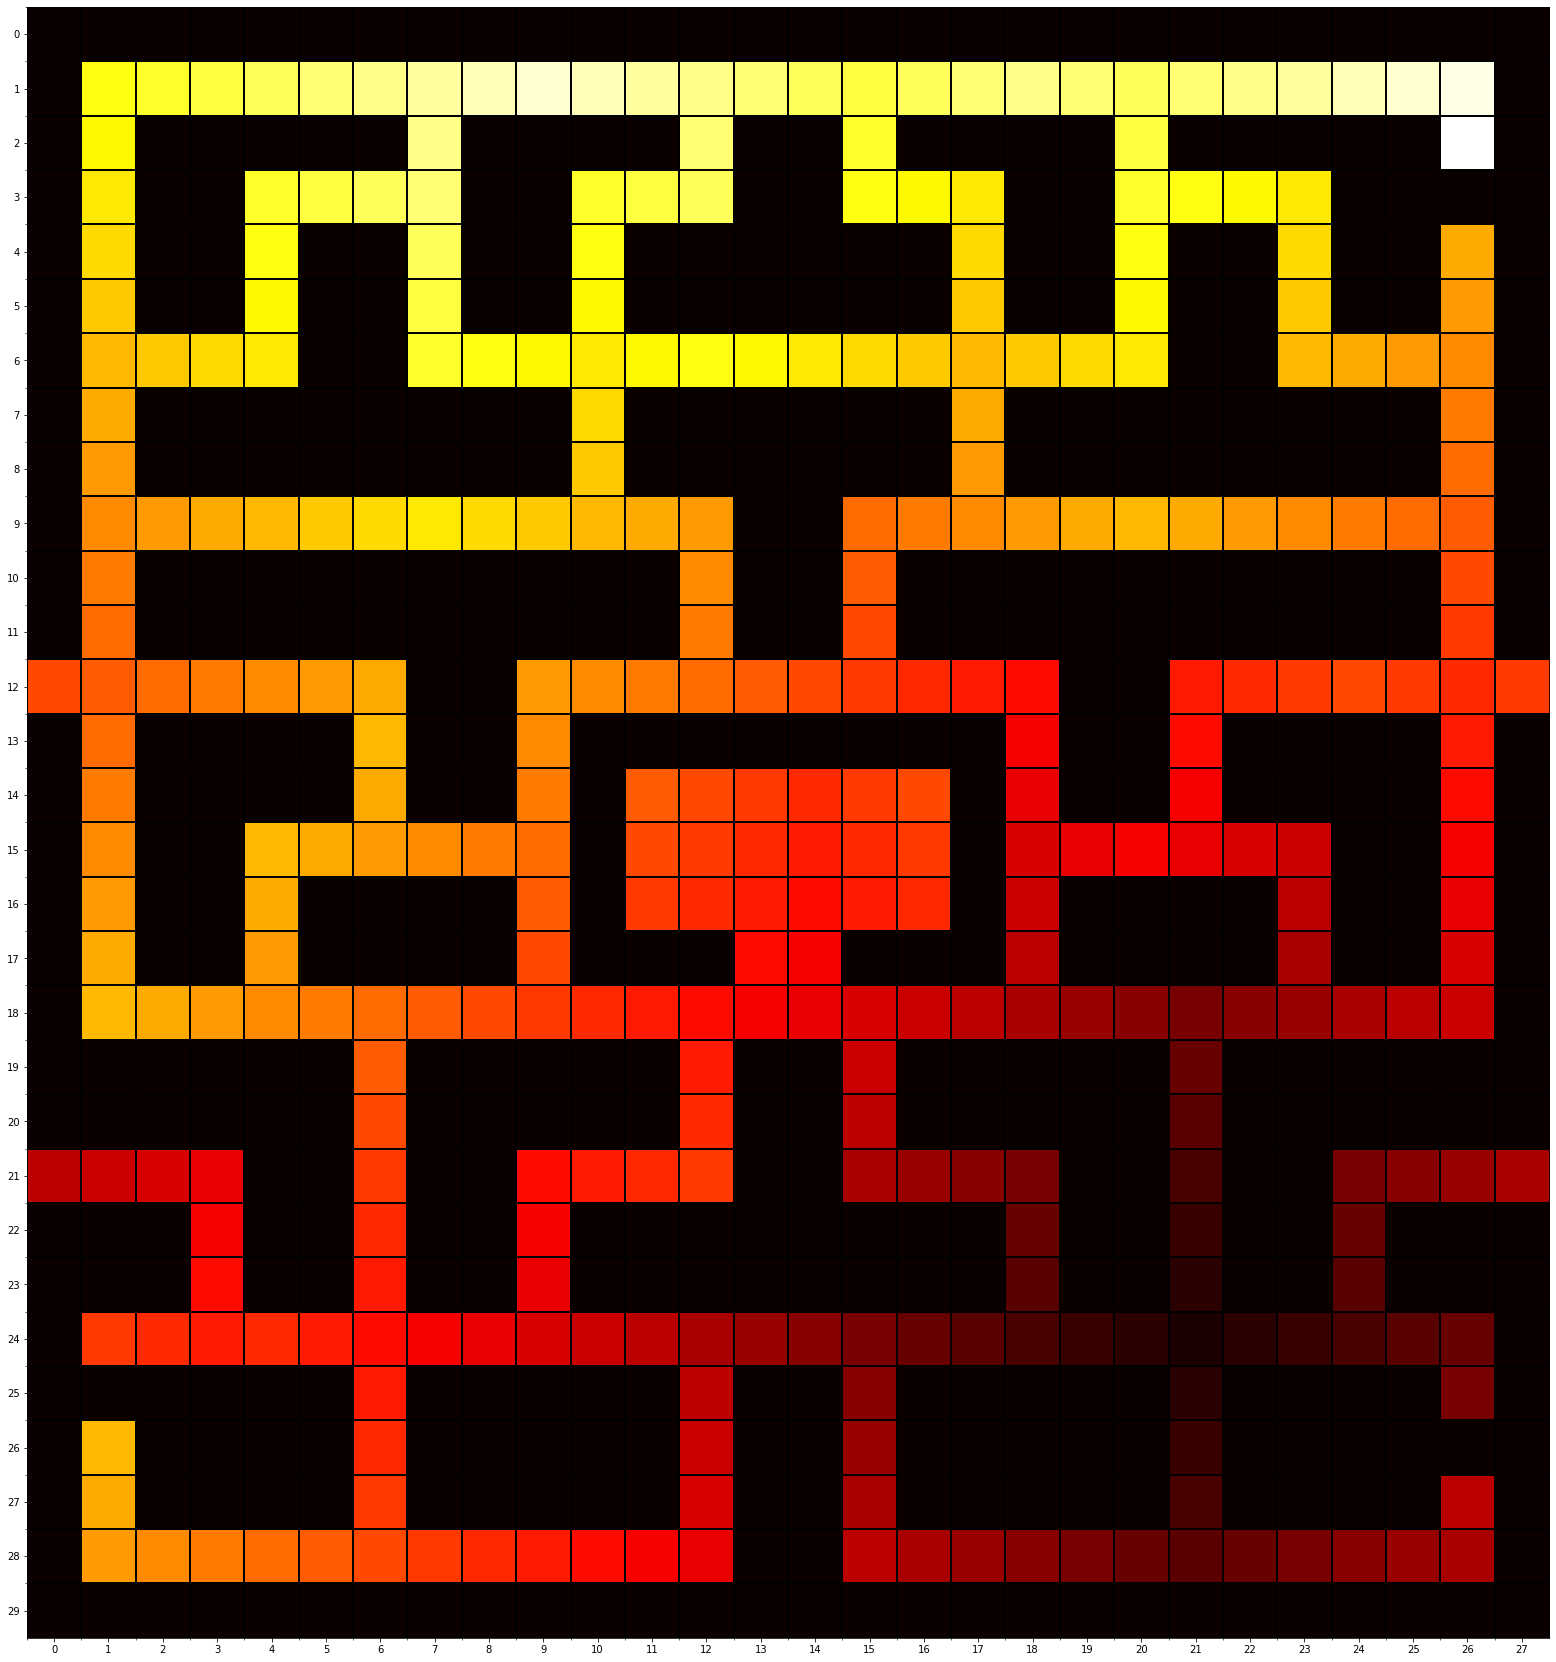

In [23]:
make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot)

Tempo execução:  0.007002353668212891
Maximum number of nodes in memory at same time:  10
Number of expanded nodes:
32
Number of expanded food nodes:
29
Number of nodes in the path:
33
Number of food nodes in the path:
29
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: 

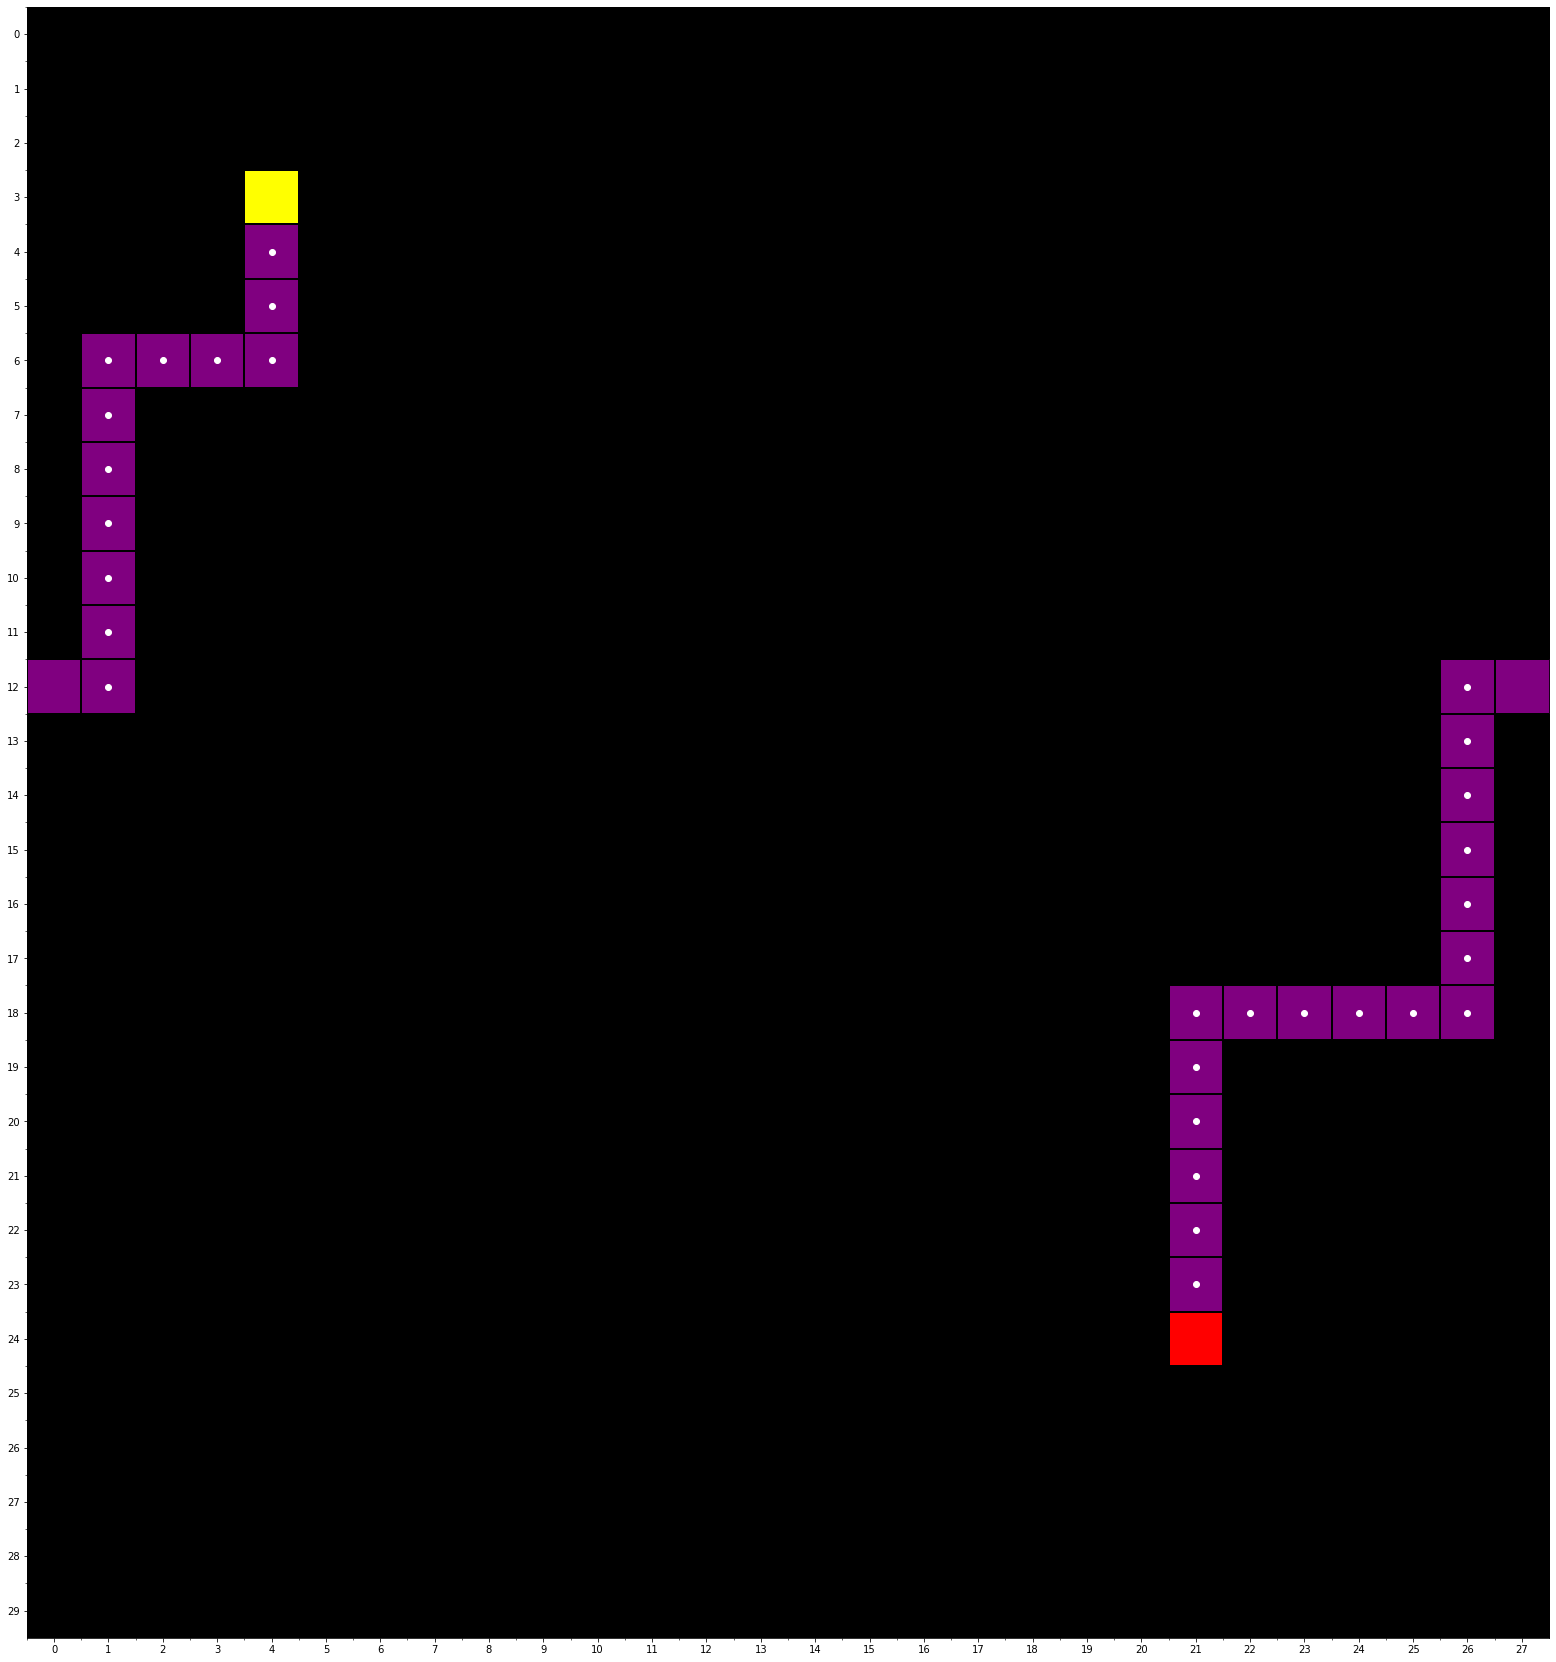

In [24]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.a_star_best_first_search(problem, problem.h_shockwave)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "AS-SH")

# Greedy Search - Shockwave Heuristic

Tempo execução:  0.007003307342529297
Maximum number of nodes in memory at same time:  10
Number of expanded nodes:
32
Number of expanded food nodes:
29
Number of nodes in the path:
33
Number of food nodes in the path:
29
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: 

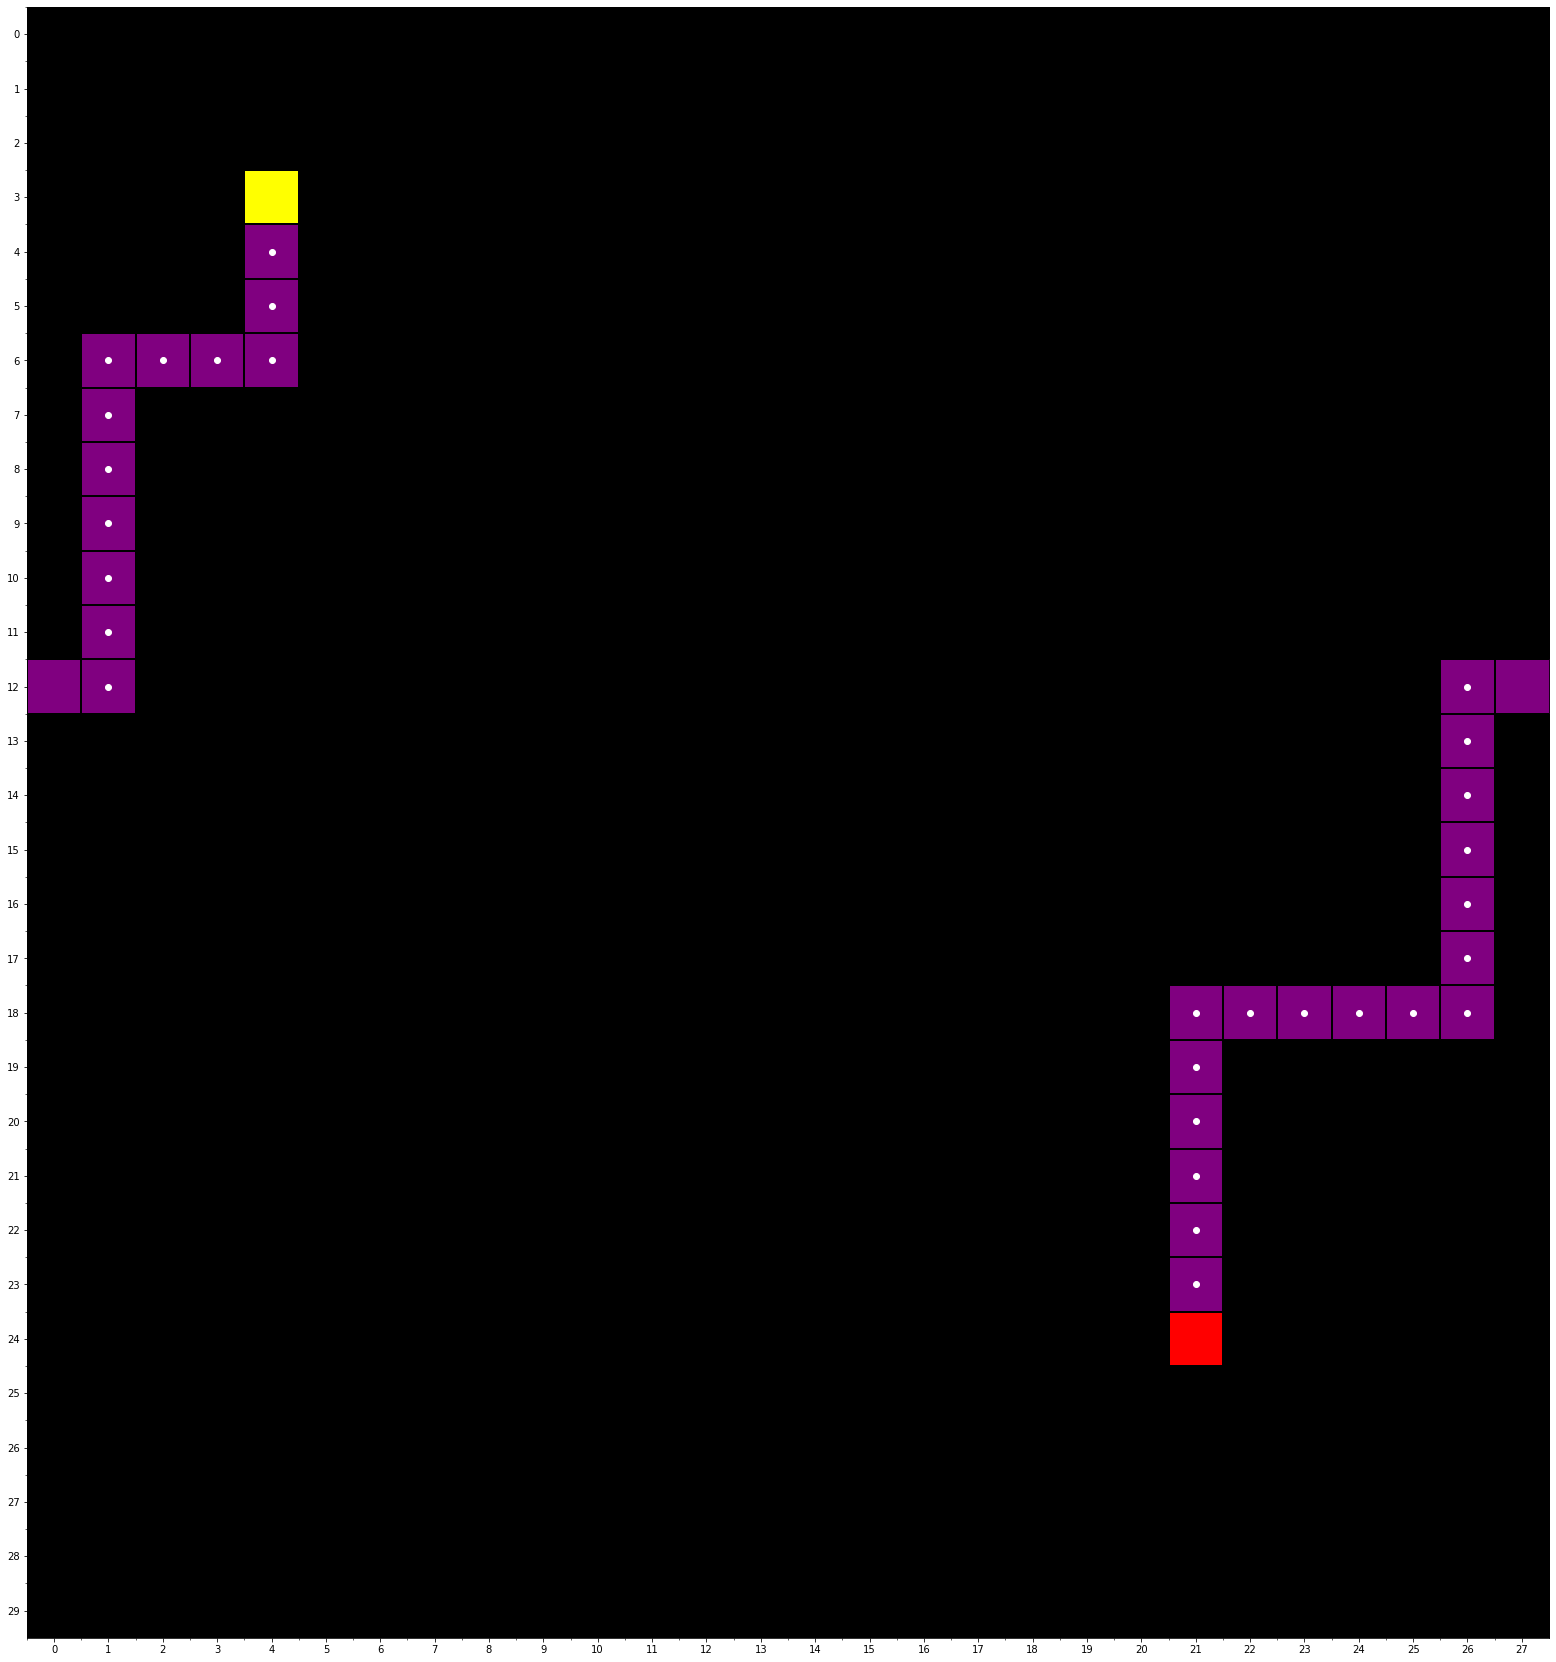

In [25]:
ini = time.time()
solution_node, expanded_nodes, food_nodes, tam = pacman.greedy_best_first_search(problem, problem.h_shockwave)
fim = time.time()
print ("Tempo execução: ", fim-ini)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, expanded_nodes, food_nodes)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "GS-SH")

# Simulated Annealing - Manhattan Heuristic

Maximum number of nodes in memory at same time:  99
Number of expanded nodes:
0
Number of expanded food nodes:
0
Number of nodes in the path:
99
Number of food nodes in the path:
80
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (

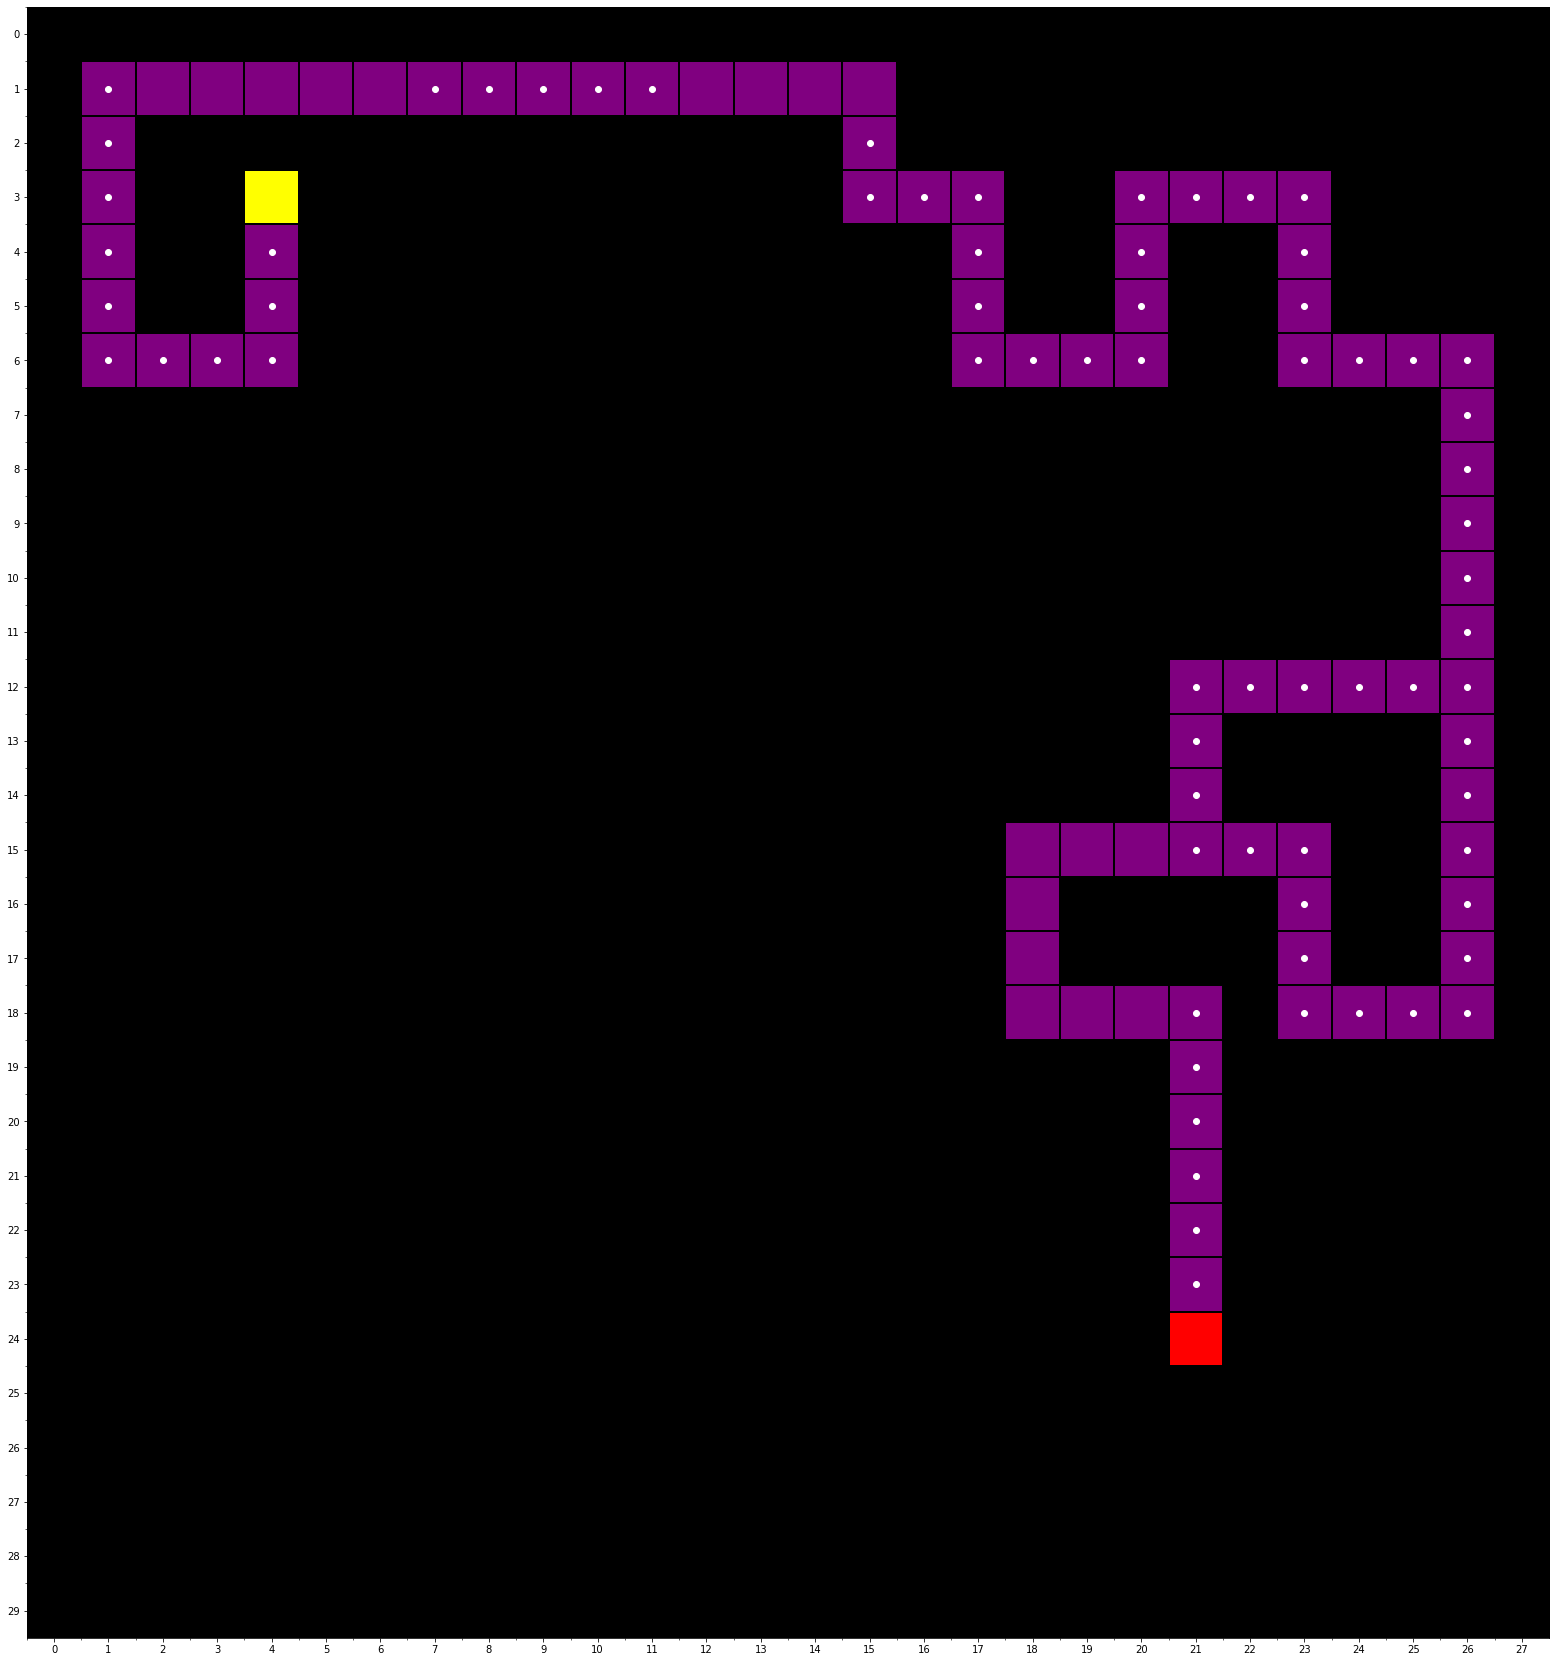

In [26]:
solution_node, tam = pacman.simulated_annealing(problem, problem_value=problem.h, weighted=True, last_visited=True, visited_refresh=2)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, 0, 0)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "SA-MH")

# Simulated Annealing - Euclidean Heuristic

Maximum number of nodes in memory at same time:  529
Number of expanded nodes:
0
Number of expanded food nodes:
0
Number of nodes in the path:
503
Number of food nodes in the path:
314
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Acti

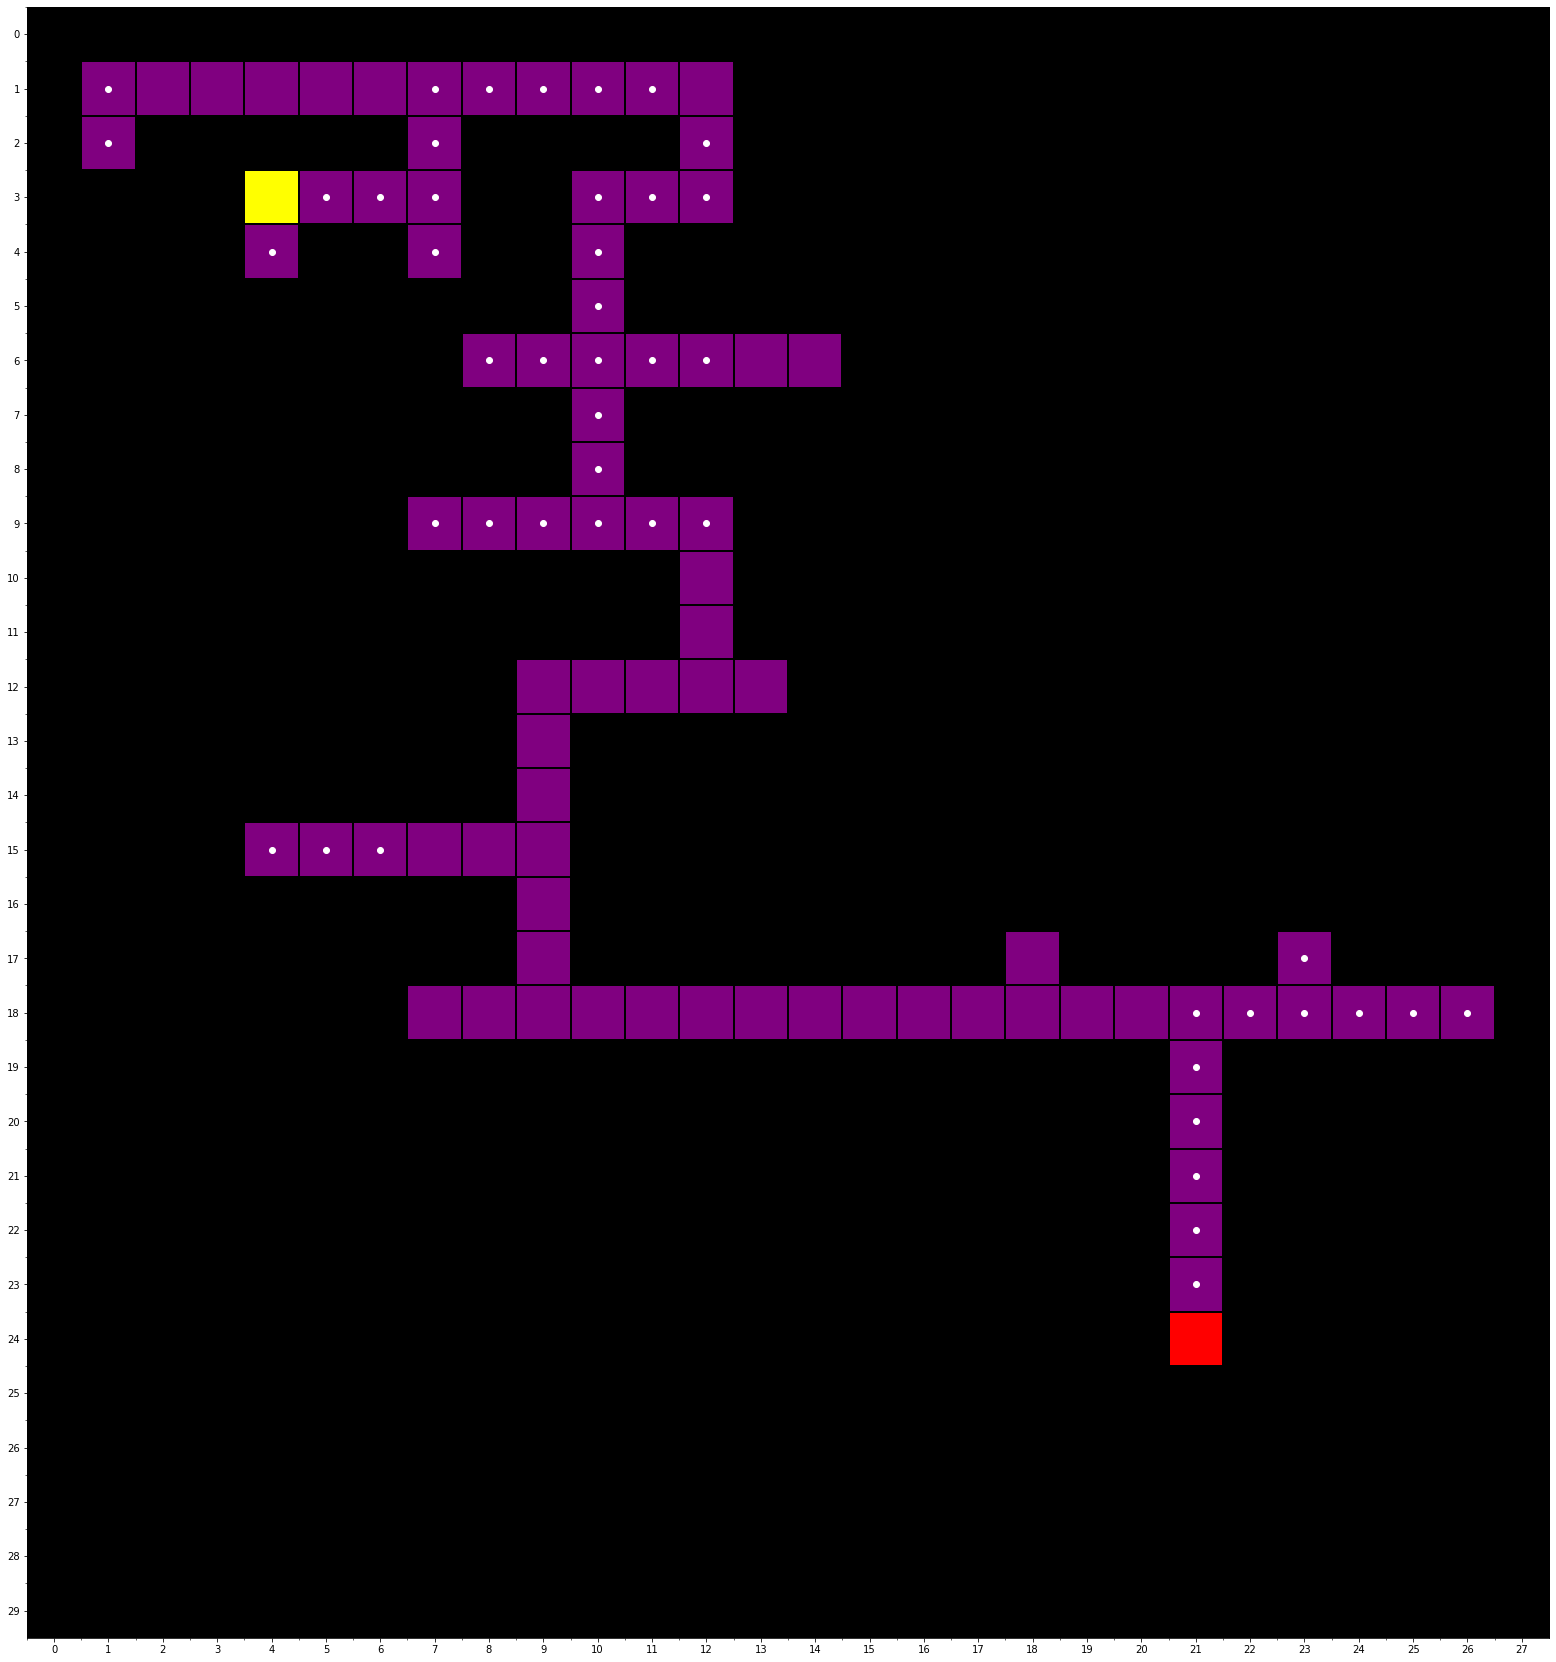

In [27]:
solution_node, tam = pacman.simulated_annealing(problem, problem_value=problem.h_euclidean)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, 0, 0)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "SA-EH")

Maximum number of nodes in memory at same time:  125
Number of expanded nodes:
0
Number of expanded food nodes:
0
Number of nodes in the path:
125
Number of food nodes in the path:
91
------------------------------------------------
[<Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>,

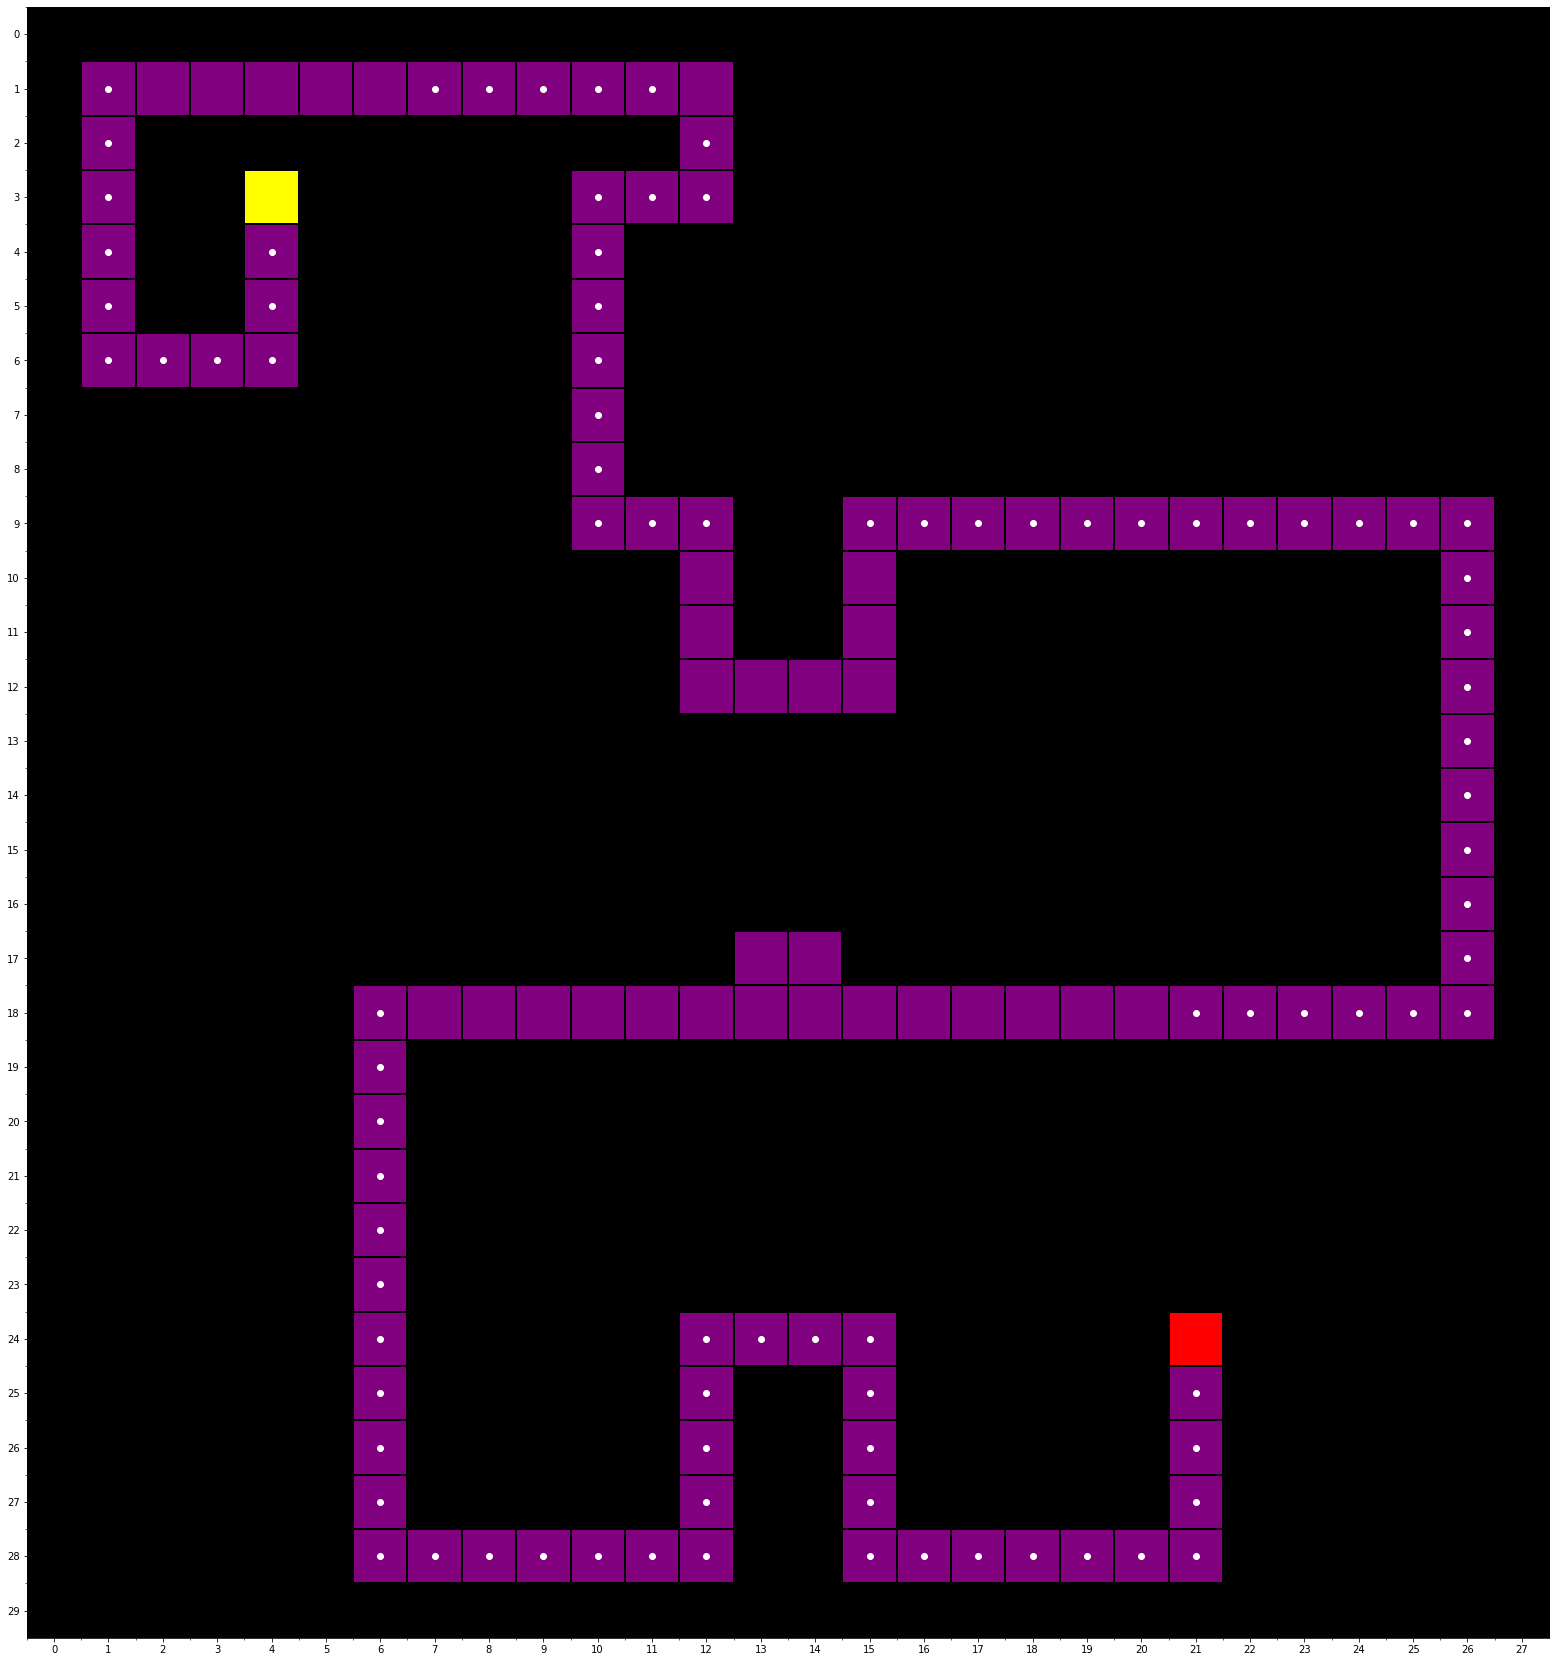

In [30]:
solution_node, tam = pacman.simulated_annealing(problem, problem_value=problem.h_euclidean, last_visited=True)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, 0, 0)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "SA-EH")

Maximum number of nodes in memory at same time:  53
Number of expanded nodes:
0
Number of expanded food nodes:
0
Number of nodes in the path:
53
Number of food nodes in the path:
30
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.RIGHT: (0, 1)>, <Actions.UP: (1, 0)>

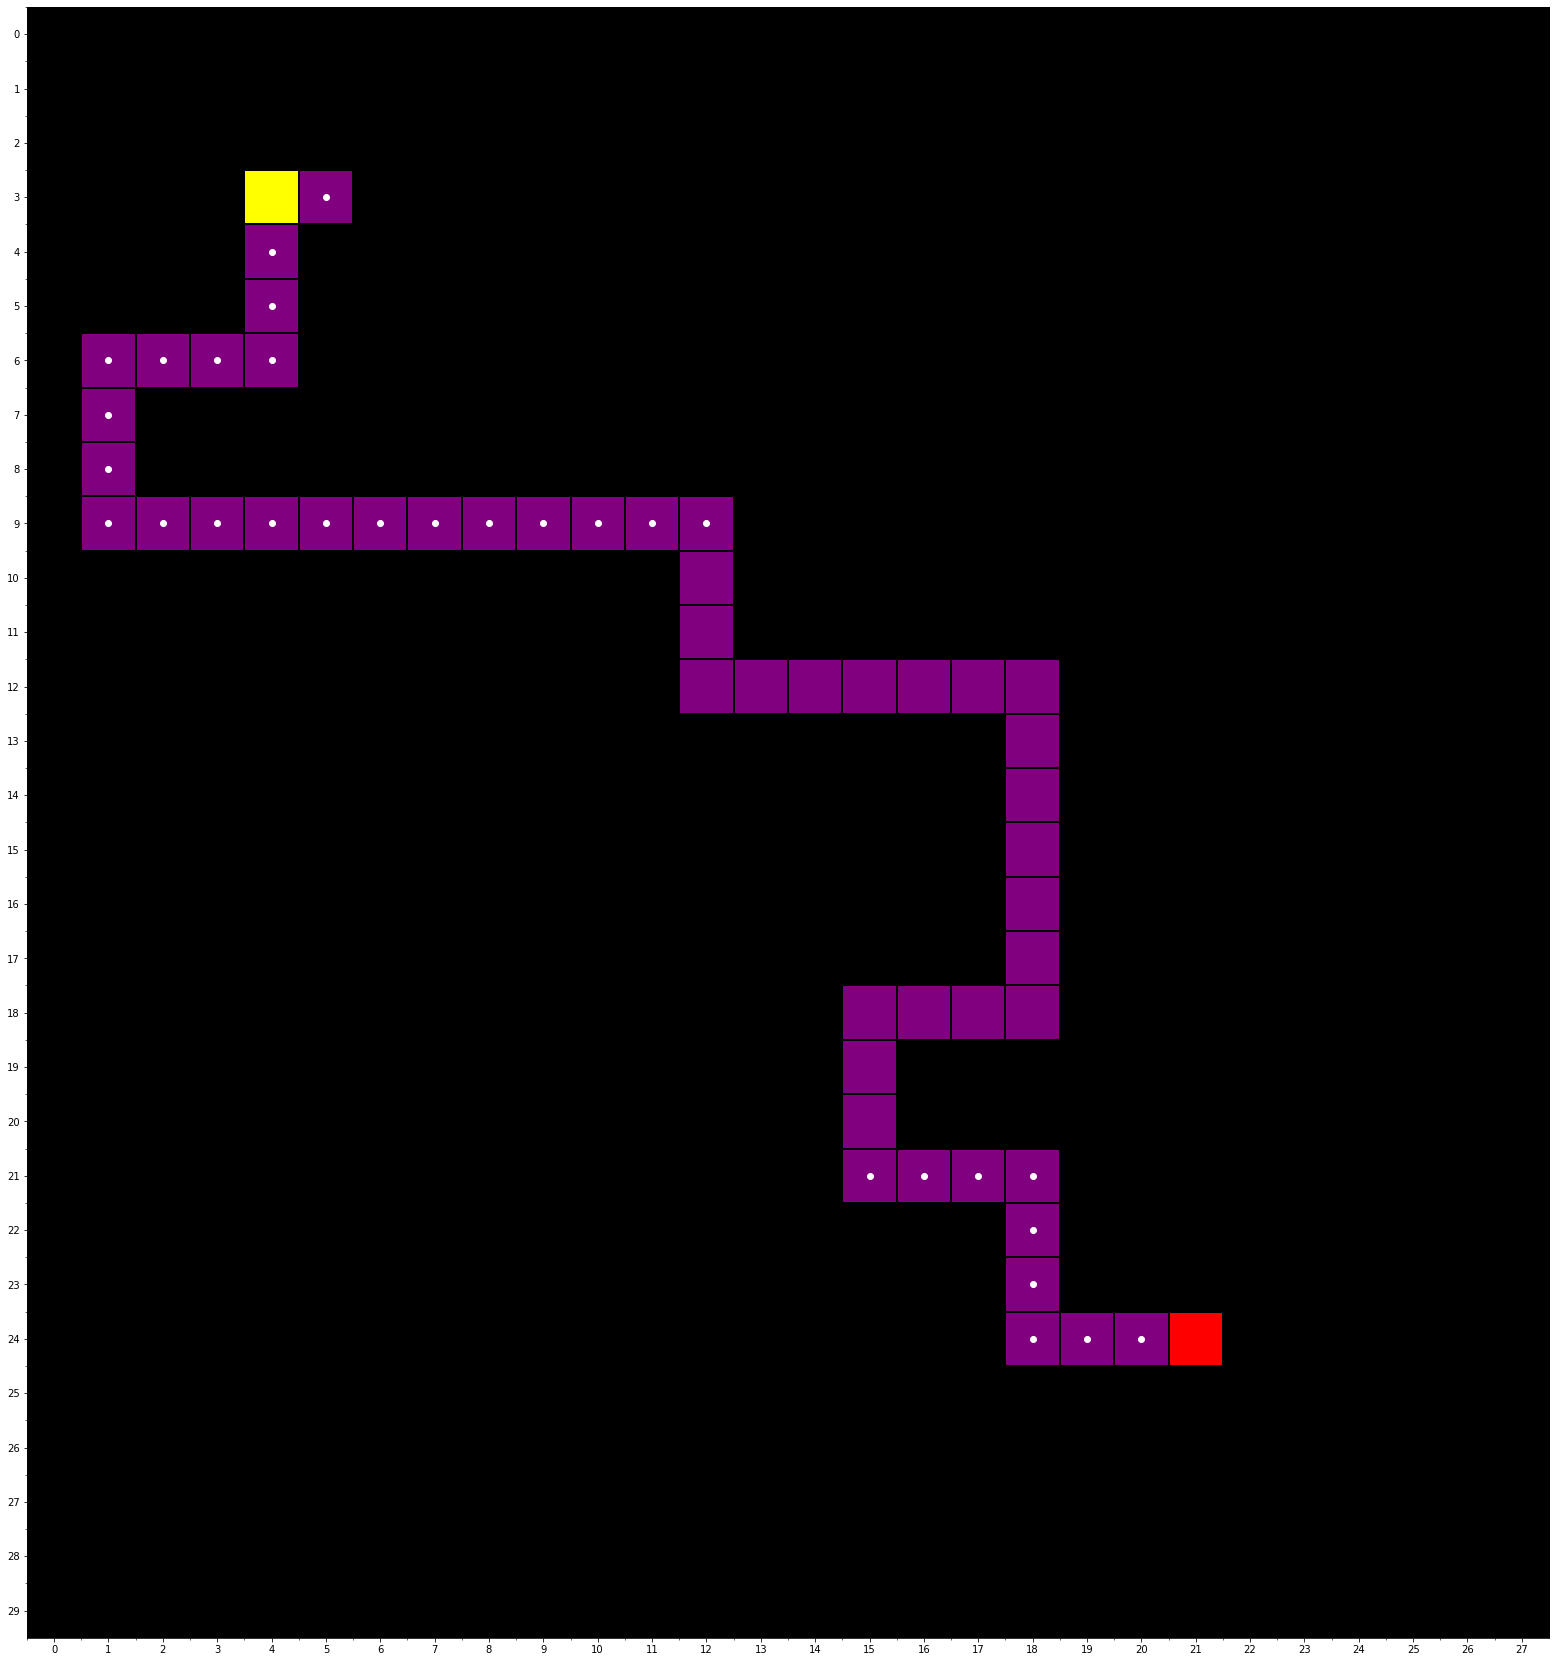

In [31]:
solution_node, tam = pacman.simulated_annealing(problem, problem_value=problem.h_euclidean, last_visited=True, weighted=True)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, 0, 0)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "SA-EH")

# Simulated Annealing - Shockwave Heuristic

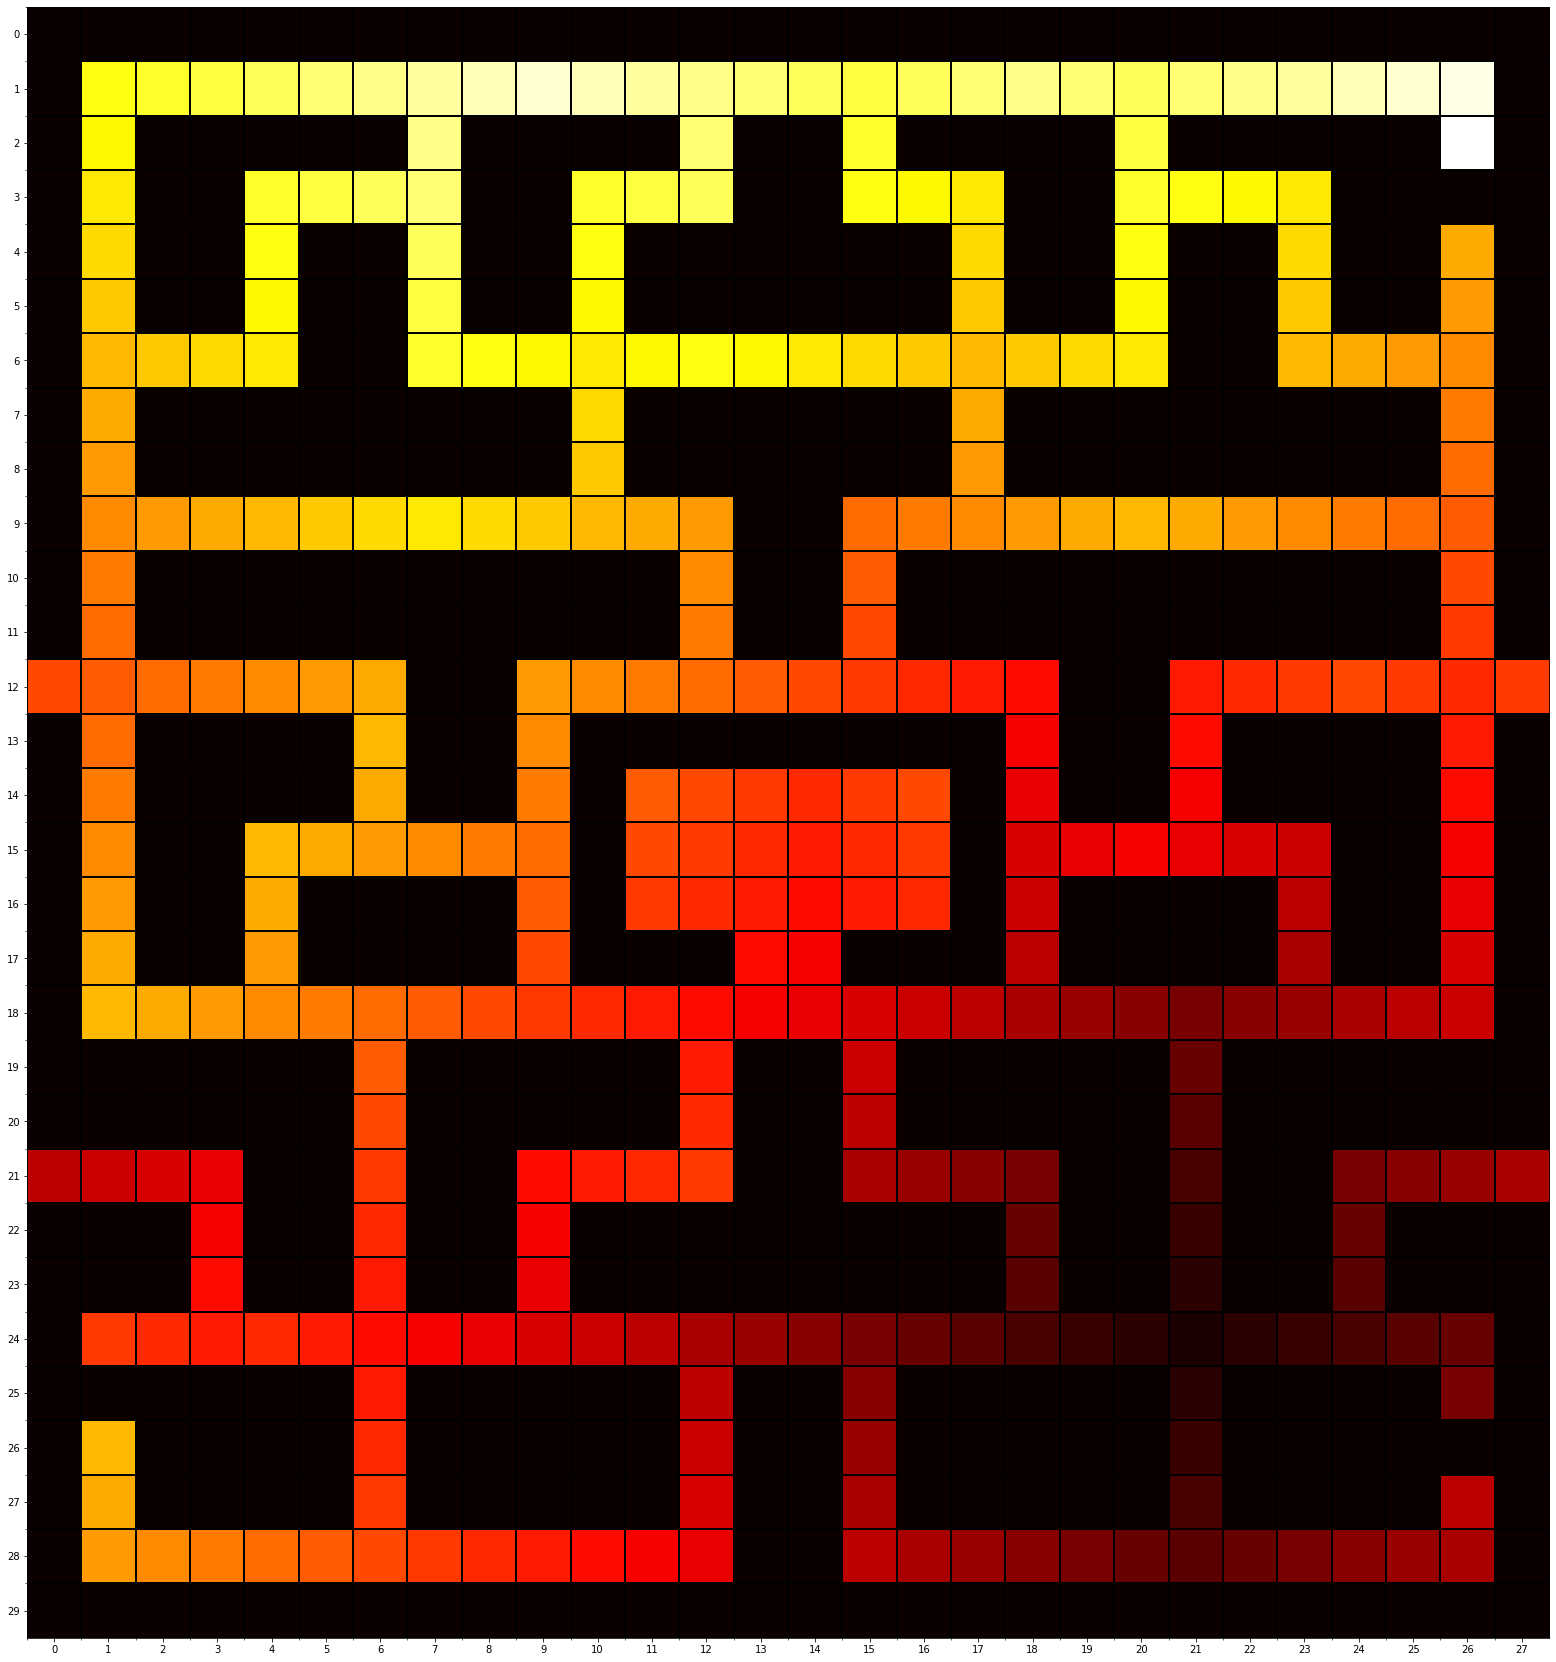

In [28]:
make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot)

Maximum number of nodes in memory at same time:  277
Number of expanded nodes:
0
Number of expanded food nodes:
0
Number of nodes in the path:
261
Number of food nodes in the path:
250
------------------------------------------------
[<Actions.RIGHT: (0, 1)>, <Actions.LEFT: (0, -1)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.LEFT: (0, -1)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.DOWN: (-1, 0)>, <Actions.UP: (1, 0)>, <Actions.UP: (1, 0)>, <Actions.R

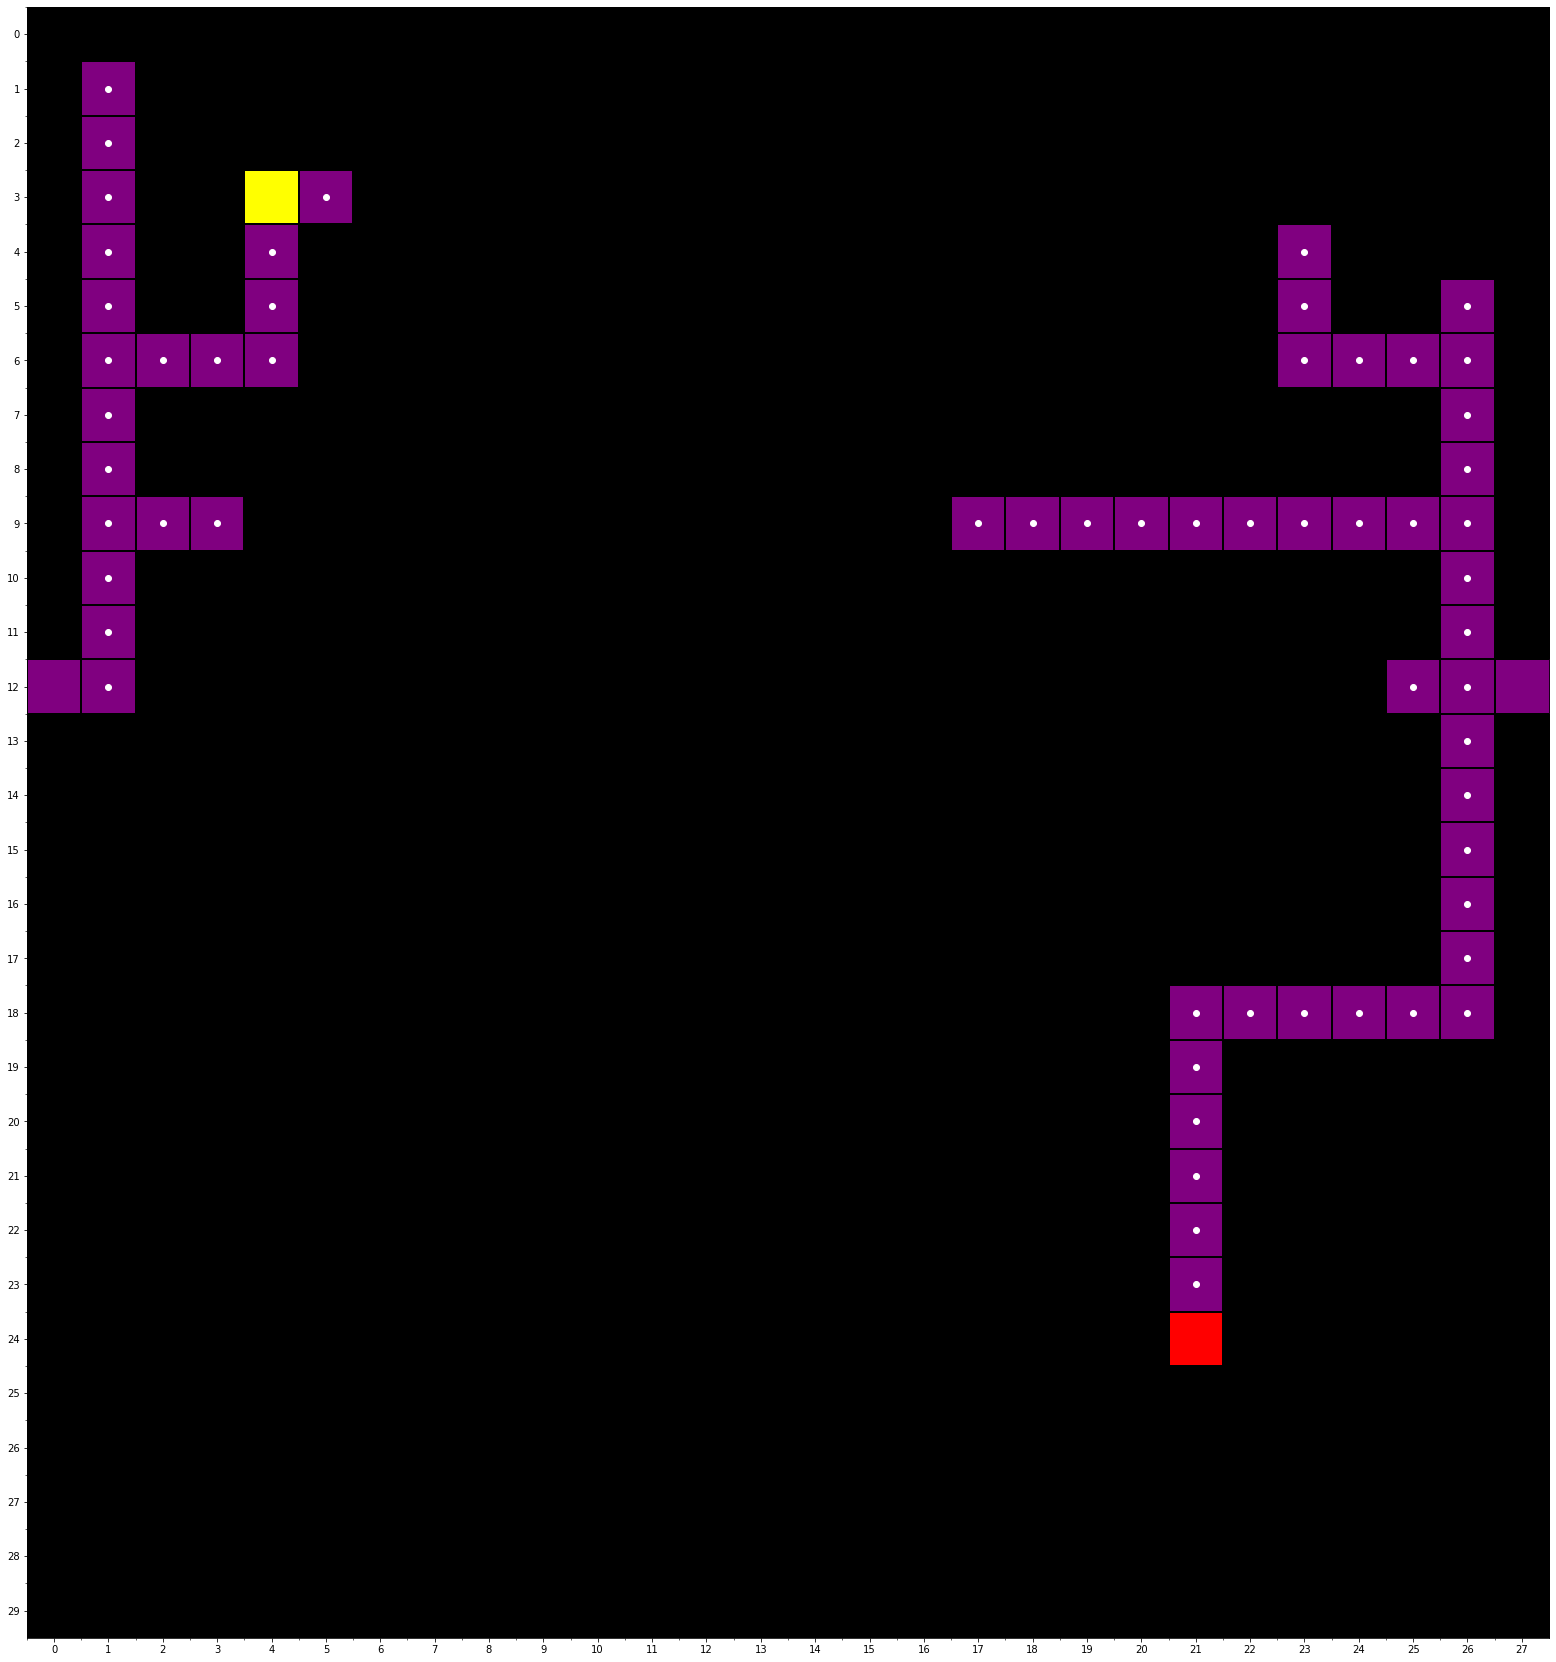

In [29]:
solution_node, tam = pacman.simulated_annealing(problem, problem_value=problem.h_shockwave)
print("Maximum number of nodes in memory at same time: ", tam)
get_solution_info(solution_node, 0, 0)
make_path_plot(maze, initial_position, goal_position, solution_node, mazeName_plot, "SA-SH")